# **BANK MARKETING CAMPAIGN**
---
### **Objective :**

1.   The goal is to predict if the client will subscribe a term deposit with that 
bank or not.
2.   To get crucial insights and patterns from the data and build Machine Learning models which helps in good predictions. 
---
### **Market Research and Prediction**
Machine learning in conjunction with big data can not only collect informati
on but also find specific patterns. For eg. it is possible to foresee whether a 
person will accept the promotional offer, determine the most profitable ide
as for investing, fraud detection, study competitors, and identify security w
eaknesses.
Machine Learning allows companies to reduce costs, it is logical that it also 
helps increase profits due to improved customer service.
### **Data Set Information:**

*   The data is related with direct marketing campaigns of a Portuguese ban
king
institution. The marketing campaigns were based on phone calls. Often, mo
re than one contact to the same client was required, in order to access if the
 product (bank term deposit) would be (&#39;yes&#39;) or not (&#39;no&#39;) subscribed.
*   The classification goal is to predict if the client will subscribe (yes/no) a t
erm deposit (variable y)

*   The dataset is available here https://www.kaggle.com/code/janiobachmann/bank-marketing-campaign-opening-a-term-deposit/data

---

### **Attribute Information:**
Input variables:

**bank client data:**

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - balance: average yearly balance, in euros (numeric)

7 - housing: has housing loan? (categorical: 'no','yes','unknown')

8 - loan: has personal loan? (categorical: 'no','yes','unknown')

related with the last contact of the current campaign:

9 - contact: contact communication type (categorical: 'cellular','telephone')

10 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

11 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

12 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

other attributes:

13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

Output variable (desired target):

17 - y - has the client subscribed a term deposit? (binary: 'yes','no')


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
raw_df = pd.read_csv('/content/bank-full - Copy.csv', sep = ";")
#raw_df = pd.read_csv('/content/bank-full - Copy.csv', sep = ";")

In [ ]:
raw_df.shape

(45211, 17)

In [ ]:
raw_df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [ ]:
raw_df.tail()

age           job   marital  education default  balance housing loan  \
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
raw_df.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

In [ ]:
raw_df['pdays'] = np.where(raw_df['pdays'] > 0, 1, raw_df['pdays'])
raw_df['pdays'] = np.where(raw_df['pdays'] < 0, 0, raw_df['pdays'])
print(raw_df['pdays'].unique())

[0 1]


In [ ]:
raw_df.rename(columns=({'y': 'subscription', 'pdays': 'called'}), inplace=True)

In [ ]:
raw_df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  called  previous poutcome  \
0  unknown    5   may       261         1       0         0  unknown   
1  unknown    5   may       151         1       0         0  unknown   
2  unknown    5   may        76         1       0         0  unknown   
3  unknown    5   may        92         1       0         0  unknown   
4  unknown    5   may       198         1       0         0  unknown   

  subscription  
0           no  
1           no  
2           no  
3           no  
4           no

In [ ]:
raw_df['subscription'].value_counts()

no     39922
yes     5289
Name: subscription, dtype: int64

# Train - Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_df, test_df = train_test_split(raw_df, test_size=0.40, random_state=42)

In [ ]:
print('train_df.shape :', train_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (27126, 17)
test_df.shape : (18085, 17)


#To plot distribution of continuous variables for training and testing data

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

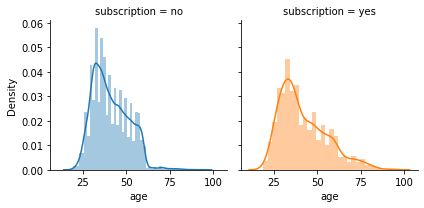

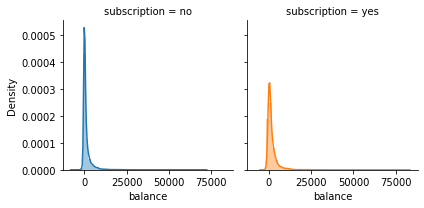

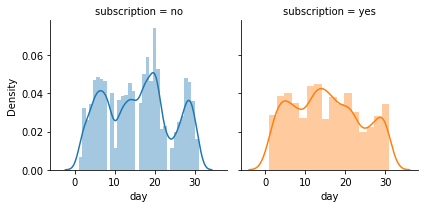

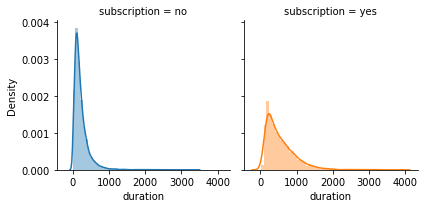

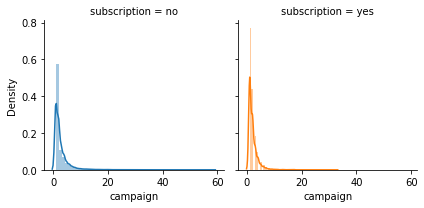

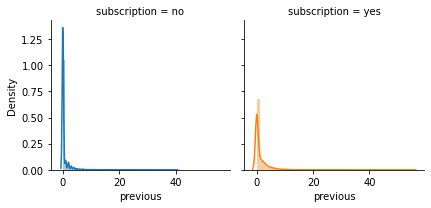

In [ ]:
fg = sns.FacetGrid(train_df, col='subscription', hue = 'subscription')
fg.map(sns.distplot, 'age')

fg = sns.FacetGrid(train_df, col='subscription', hue = 'subscription')
fg.map(sns.distplot, 'balance')

fg = sns.FacetGrid(train_df, col='subscription', hue = 'subscription')
fg.map(sns.distplot, 'day')

fg = sns.FacetGrid(train_df, col='subscription', hue = 'subscription')
fg.map(sns.distplot, 'duration')

fg = sns.FacetGrid(train_df, col='subscription', hue = 'subscription')
fg.map(sns.distplot, 'campaign')

fg = sns.FacetGrid(train_df, col='subscription', hue = 'subscription')
fg.map(sns.distplot, 'previous')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

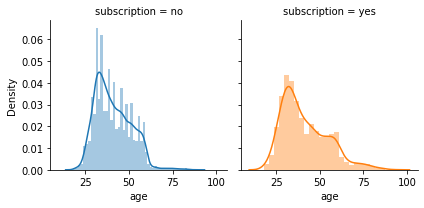

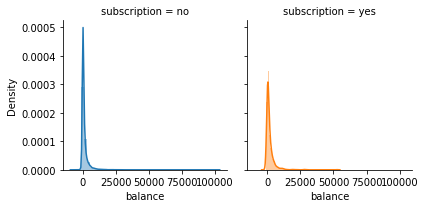

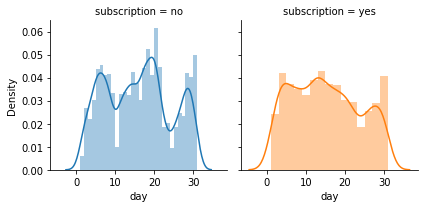

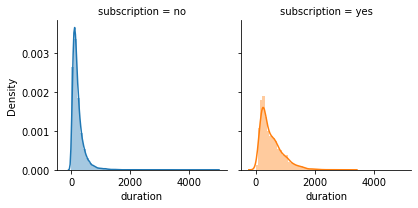

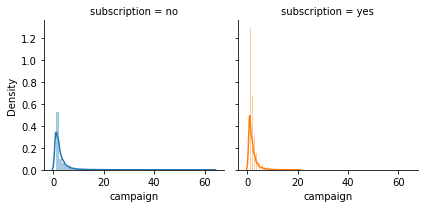

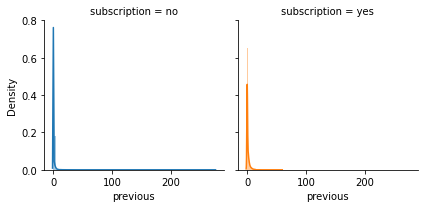

In [ ]:
fg = sns.FacetGrid(test_df, col='subscription', hue = 'subscription')
fg.map(sns.distplot, 'age')

fg = sns.FacetGrid(test_df, col='subscription', hue = 'subscription')
fg.map(sns.distplot, 'balance')

fg = sns.FacetGrid(test_df, col='subscription', hue = 'subscription')
fg.map(sns.distplot, 'day')

fg = sns.FacetGrid(test_df, col='subscription', hue = 'subscription')
fg.map(sns.distplot, 'duration')

fg = sns.FacetGrid(test_df, col='subscription', hue = 'subscription')
fg.map(sns.distplot, 'campaign')

fg = sns.FacetGrid(test_df, col='subscription', hue = 'subscription')
fg.map(sns.distplot, 'previous')

#To plot countplots of categorical variables on training data

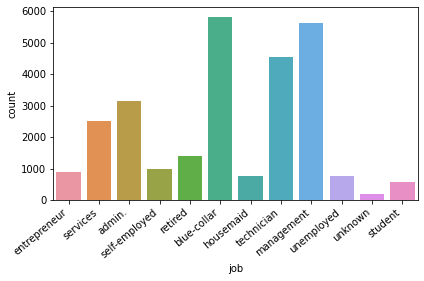

In [ ]:
ax = sns.countplot(x="job", data=train_df)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()


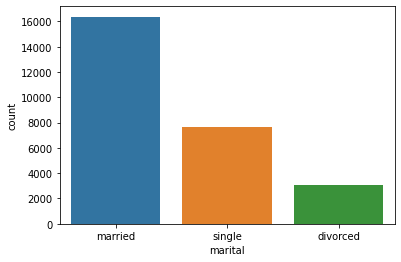

In [ ]:
sns.countplot(x='marital',data = train_df);

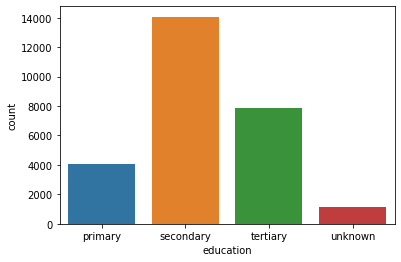

In [ ]:
sns.countplot(x='education',data = train_df);

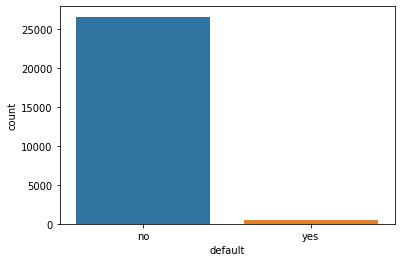

In [ ]:
sns.countplot(x='default',data = train_df);

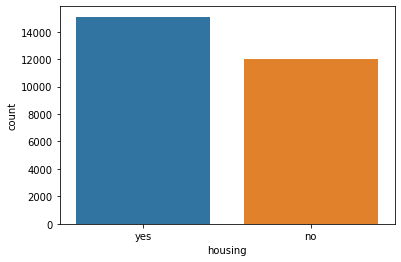

In [ ]:
sns.countplot(x='housing',data = train_df);

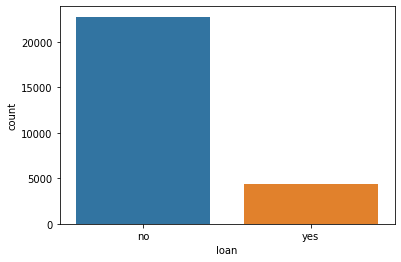

In [ ]:
sns.countplot(x='loan',data = train_df);

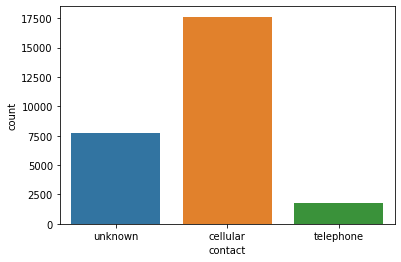

In [ ]:
sns.countplot(x='contact',data = train_df);

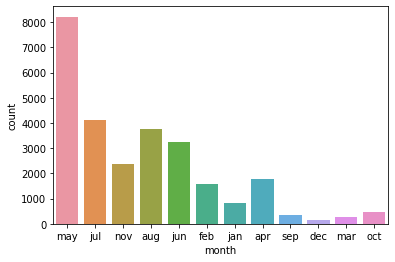

In [ ]:
sns.countplot(x='month',data = train_df);

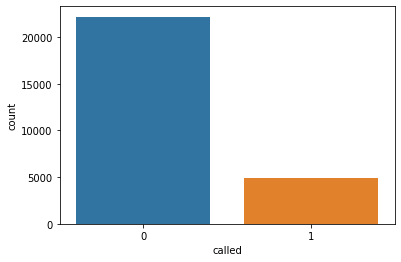

In [ ]:
sns.countplot(x='called',data = train_df);

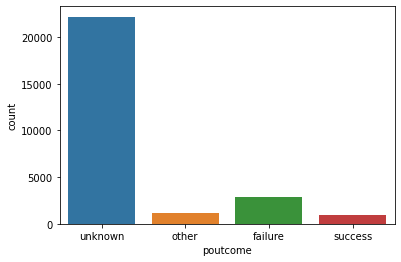

In [ ]:
sns.countplot(x='poutcome',data = train_df);

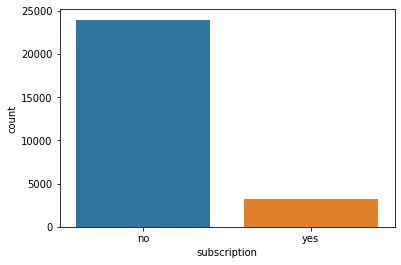

In [ ]:
sns.countplot(x='subscription',data = train_df);

#To plot countplots of categorical variables on testing data

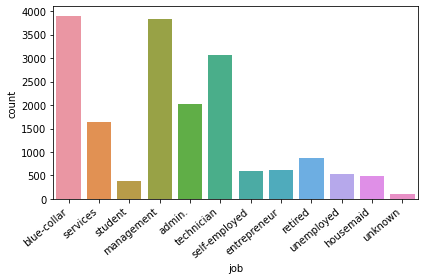

In [ ]:
ax = sns.countplot(x="job", data=test_df)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()


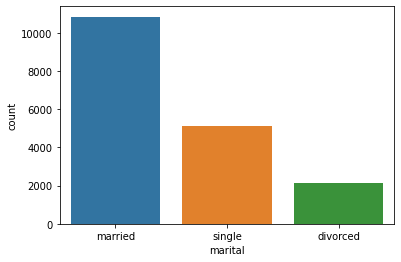

In [ ]:
sns.countplot(x='marital',data = test_df);

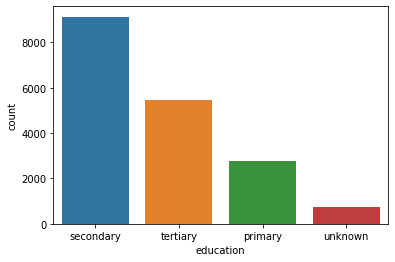

In [ ]:
sns.countplot(x='education',data = test_df);

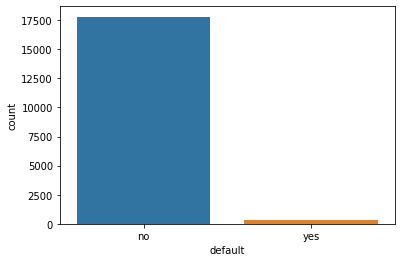

In [ ]:
sns.countplot(x='default',data = test_df);

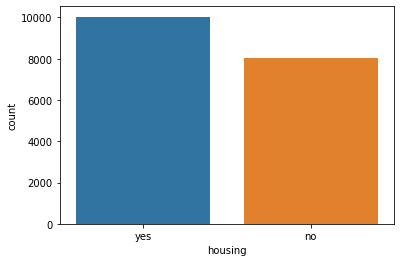

In [ ]:
sns.countplot(x='housing',data = test_df);

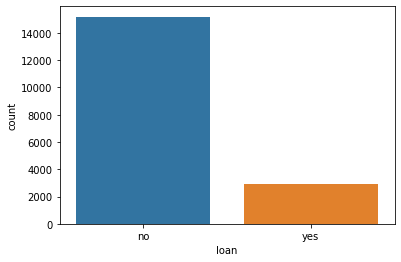

In [ ]:
sns.countplot(x='loan',data = test_df);

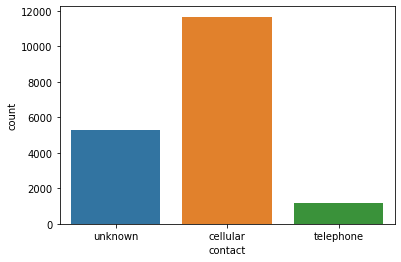

In [ ]:
sns.countplot(x='contact',data = test_df);

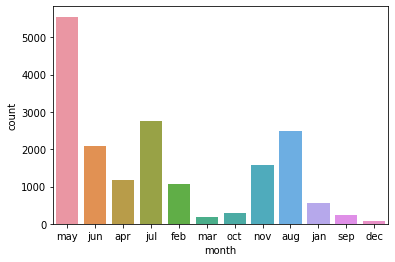

In [ ]:
sns.countplot(x='month',data = test_df);

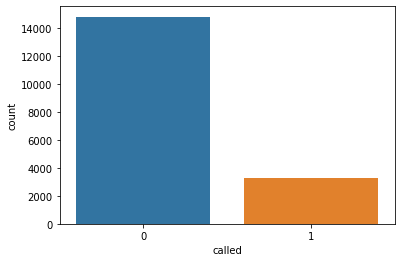

In [ ]:
sns.countplot(x='called',data = test_df);

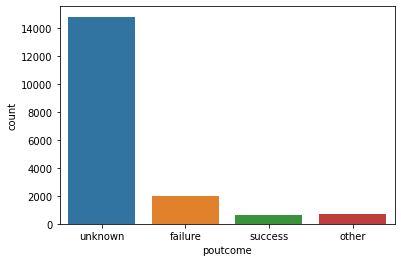

In [ ]:
sns.countplot(x='poutcome',data = test_df);

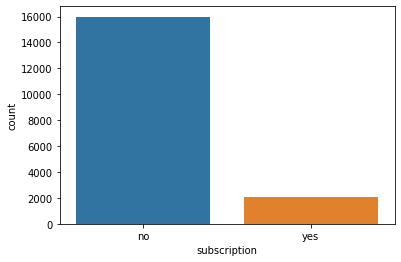

In [ ]:
sns.countplot(x='subscription',data = test_df);

#Univariate outlier detection using boxplot for training data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


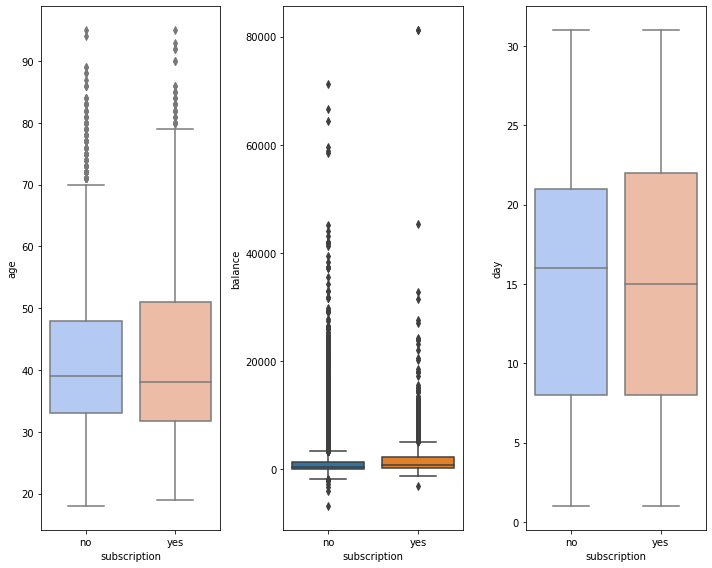

In [ ]:
plt.rcParams['figure.figsize']=(10,8)
f, (ax1,ax2,ax3) = plt.subplots(1,3)
sns.boxplot('subscription', 'age', data=train_df, ax=ax1, palette = 'coolwarm')
sns.boxplot('subscription', 'balance', data=train_df, ax=ax2)
sns.boxplot('subscription', 'day', data=train_df, ax=ax3, palette = 'coolwarm')
f.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


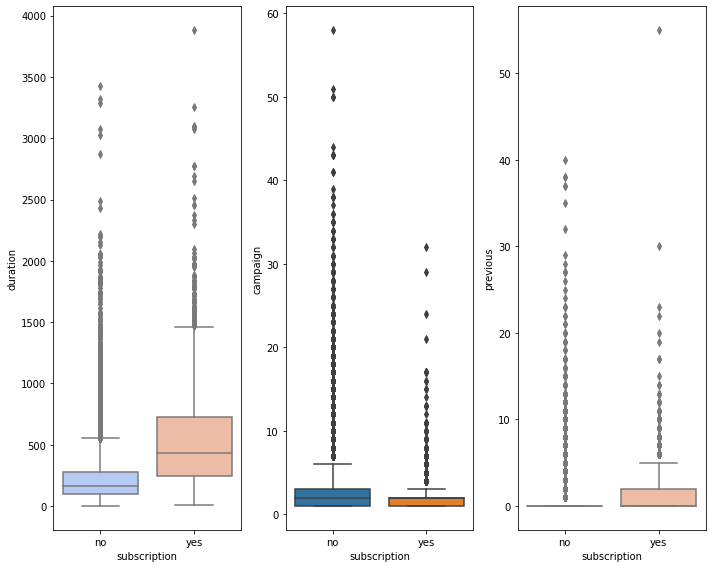

In [ ]:
plt.rcParams['figure.figsize']=(10,8)
f, (ax1,ax2,ax3) = plt.subplots(1,3)
sns.boxplot('subscription', 'duration', data=train_df, ax=ax1, palette = 'coolwarm')
sns.boxplot('subscription', 'campaign', data=train_df, ax=ax2)
sns.boxplot('subscription', 'previous', data=train_df, ax=ax3, palette = 'coolwarm')
f.tight_layout()

#Univariate outlier detection using boxplot for testing data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


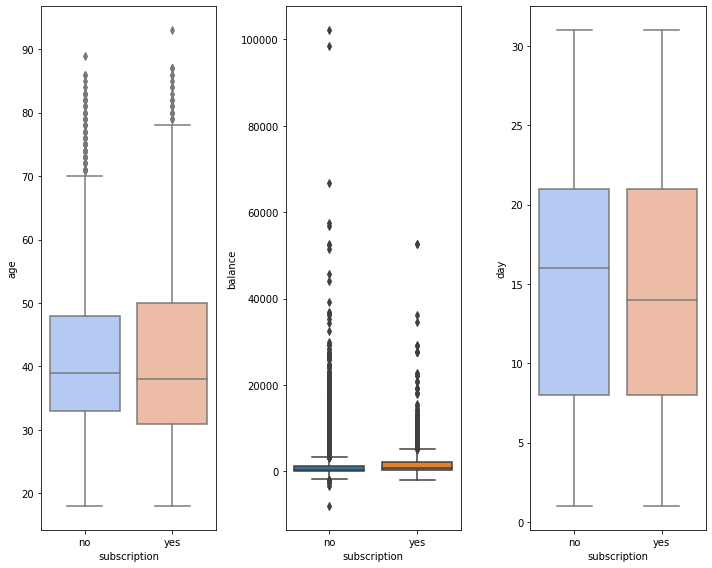

In [ ]:
plt.rcParams['figure.figsize']=(10,8)
f, (ax1,ax2,ax3) = plt.subplots(1,3)
sns.boxplot('subscription', 'age', data=test_df, ax=ax1, palette = 'coolwarm')
sns.boxplot('subscription', 'balance', data=test_df, ax=ax2)
sns.boxplot('subscription', 'day', data=test_df, ax=ax3, palette = 'coolwarm')
f.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


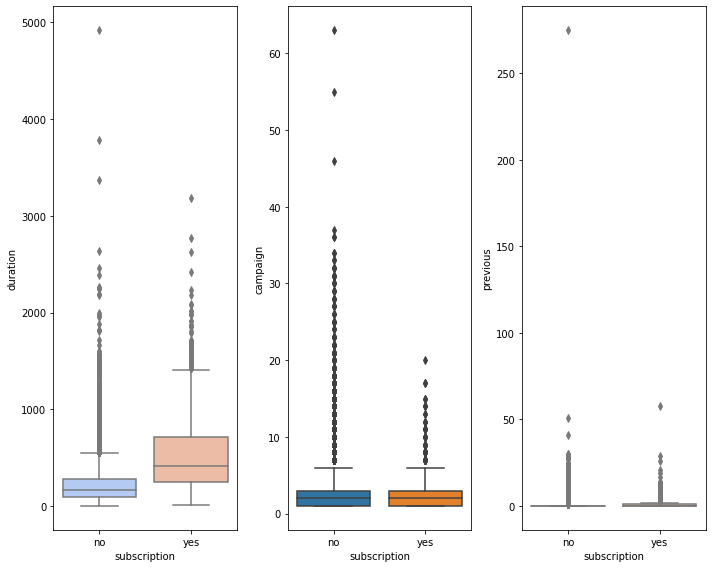

In [ ]:
plt.rcParams['figure.figsize']=(10,8)
f, (ax1,ax2,ax3) = plt.subplots(1,3)
sns.boxplot('subscription', 'duration', data=test_df, ax=ax1, palette = 'coolwarm')
sns.boxplot('subscription', 'campaign', data=test_df, ax=ax2)
sns.boxplot('subscription', 'previous', data=test_df, ax=ax3, palette = 'coolwarm')
f.tight_layout()

#Multivariate outlier detection using LOF for training data

In [ ]:
numerical=[]
for num in train_df.columns:
    if train_df[num].dtype != "O":
        numerical.append(num)
print(f"There are {len(numerical)} numerical variables, --> {numerical}")

There are 7 numerical variables, --> ['age', 'balance', 'day', 'duration', 'campaign', 'called', 'previous']


In [ ]:
numerical

['age', 'balance', 'day', 'duration', 'campaign', 'called', 'previous']

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
model = LocalOutlierFactor(n_neighbors=5) 
print(model)  
model.fit_predict(train_df[numerical]) 

LocalOutlierFactor(n_neighbors=5)


array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
model = LocalOutlierFactor(n_neighbors=6) 
print(model)  
model.fit_predict(train_df[numerical]) 

LocalOutlierFactor(n_neighbors=6)


array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
model = LocalOutlierFactor(n_neighbors=7) 
print(model)  
model.fit_predict(train_df[numerical]) 

LocalOutlierFactor(n_neighbors=7)


array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
model = LocalOutlierFactor(n_neighbors=8)
print(model)  
model.fit_predict(train_df[numerical]) 

LocalOutlierFactor(n_neighbors=8)


array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
model = LocalOutlierFactor(n_neighbors=9) 
print(model)  
model.fit_predict(train_df[numerical]) 

LocalOutlierFactor(n_neighbors=9)


array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
model = LocalOutlierFactor(n_neighbors=10) 
print(model)  
model.fit_predict(train_df[numerical]) 

LocalOutlierFactor(n_neighbors=10)


array([1, 1, 1, ..., 1, 1, 1])

#Scatterplot on continuous variables for training data

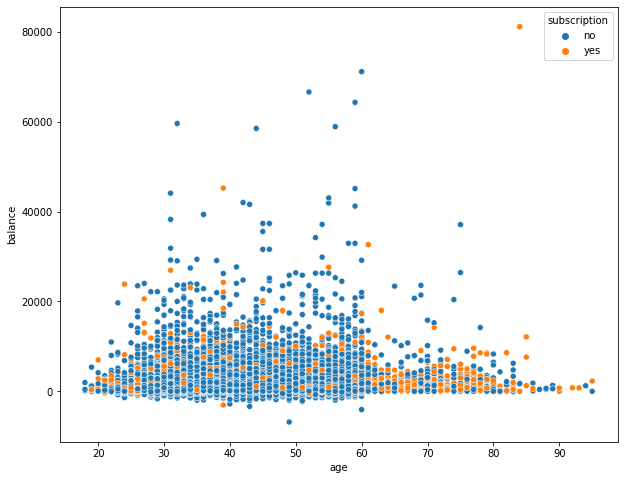

In [ ]:
sns.scatterplot(data=train_df, x="age", y="balance", hue="subscription")

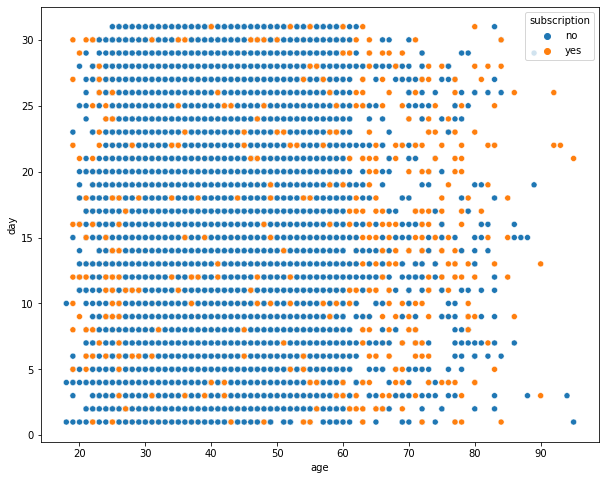

In [ ]:
sns.scatterplot(data=train_df, x="age", y="day", hue="subscription")

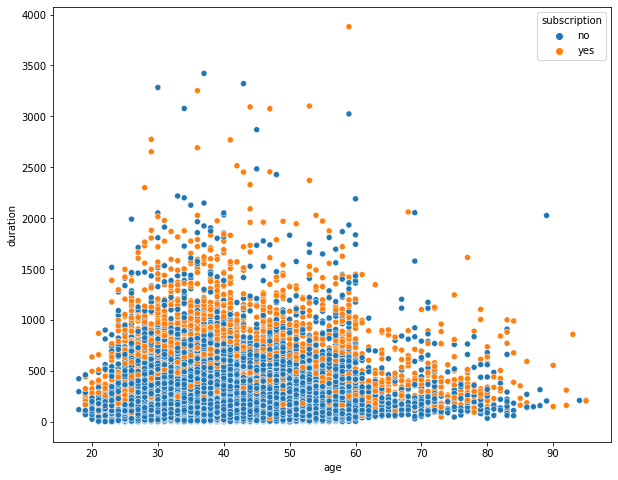

In [ ]:
sns.scatterplot(data=train_df, x="age", y="duration", hue="subscription")

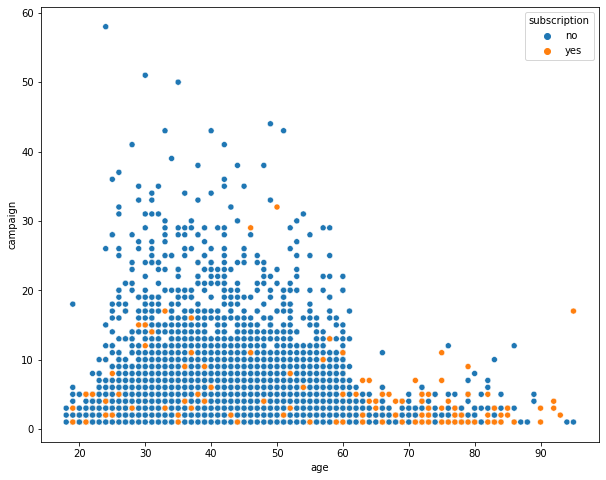

In [ ]:
sns.scatterplot(data=train_df, x="age", y="campaign", hue="subscription")

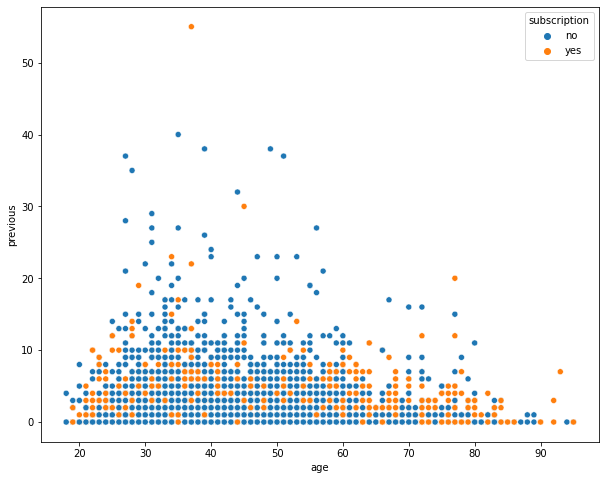

In [ ]:
sns.scatterplot(data=train_df, x="age", y="previous", hue="subscription")

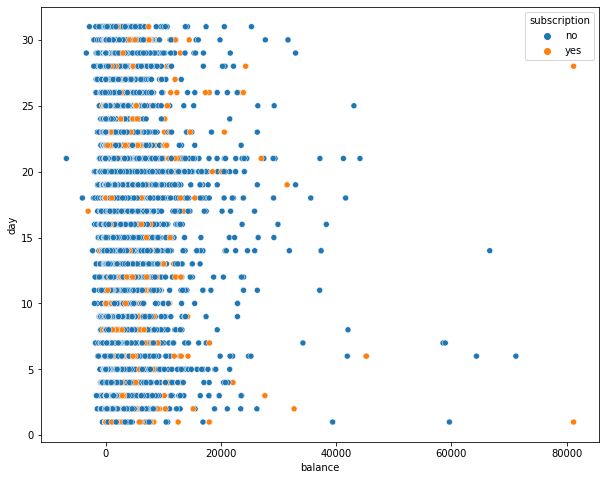

In [ ]:
sns.scatterplot(data=train_df, x="balance", y="day", hue="subscription")

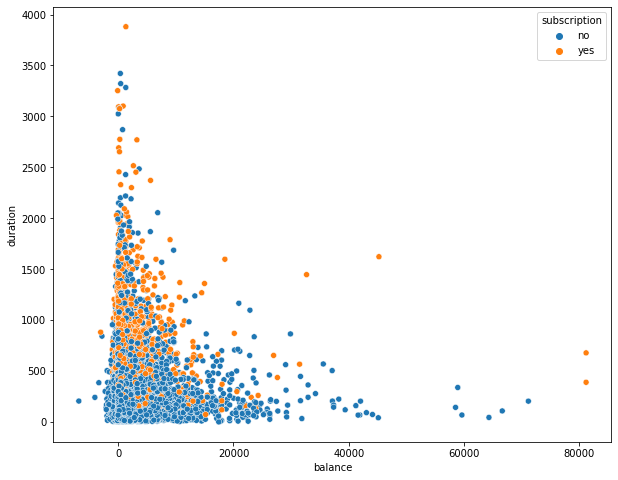

In [ ]:
sns.scatterplot(data=train_df, x="balance", y="duration", hue="subscription")

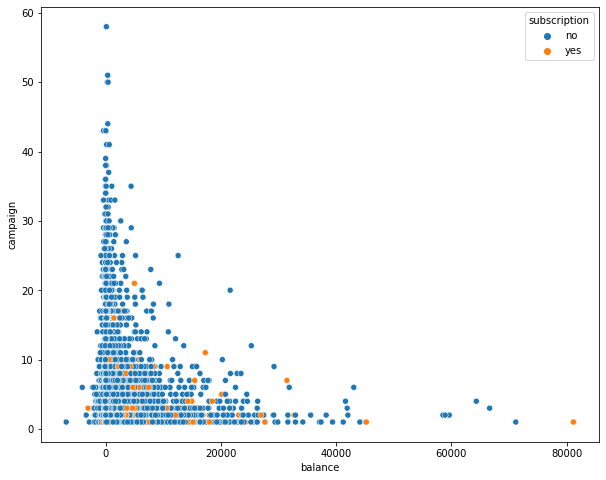

In [ ]:
sns.scatterplot(data=train_df, x="balance", y="campaign", hue="subscription")

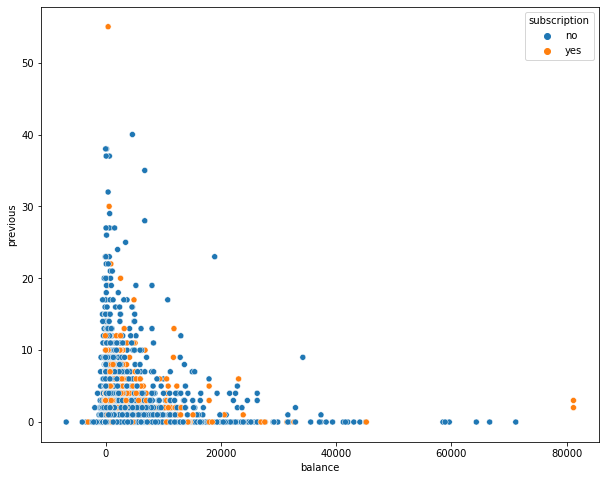

In [ ]:
sns.scatterplot(data=train_df, x="balance", y="previous", hue="subscription")

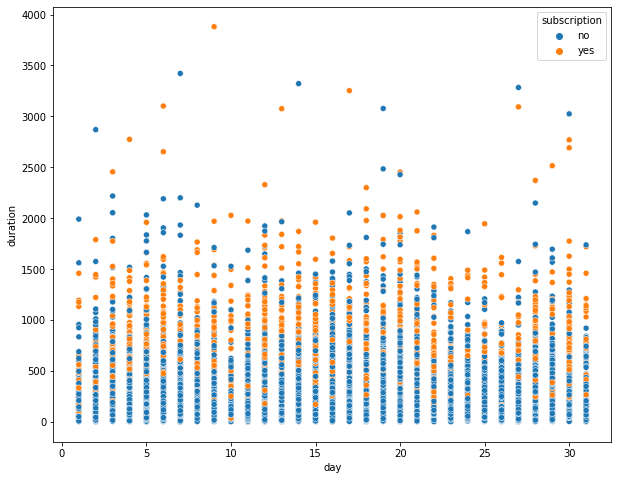

In [ ]:
sns.scatterplot(data=train_df, x="day", y="duration", hue="subscription")

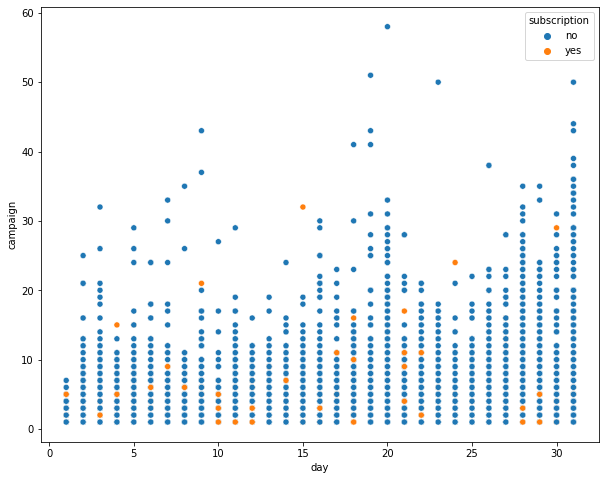

In [ ]:
sns.scatterplot(data=train_df, x="day", y="campaign", hue="subscription")

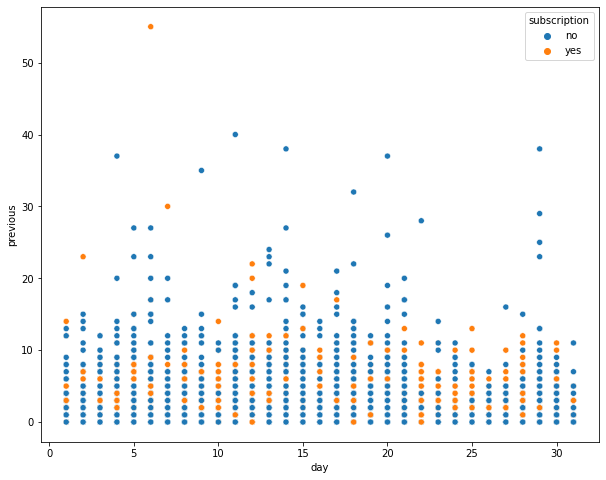

In [ ]:
sns.scatterplot(data=train_df, x="day", y="previous", hue="subscription")

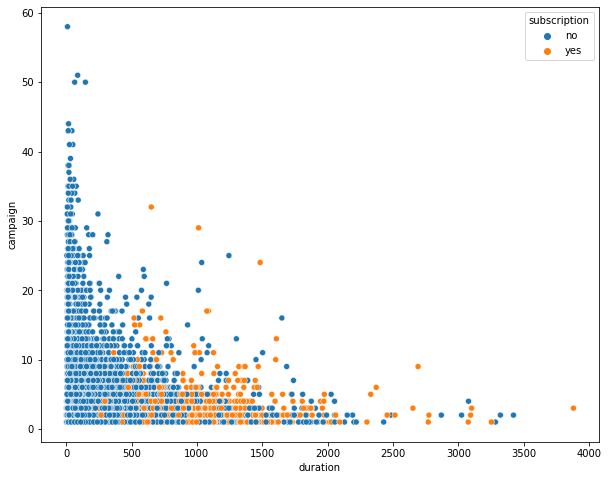

In [ ]:
sns.scatterplot(data=train_df, x="duration", y="campaign", hue="subscription")

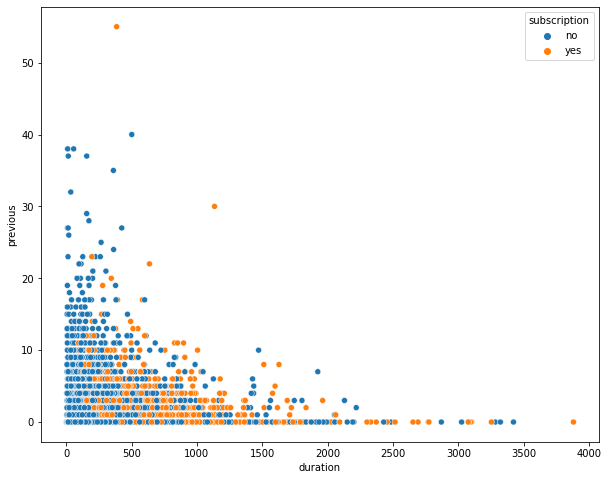

In [ ]:
sns.scatterplot(data=train_df, x="duration", y="previous", hue="subscription")

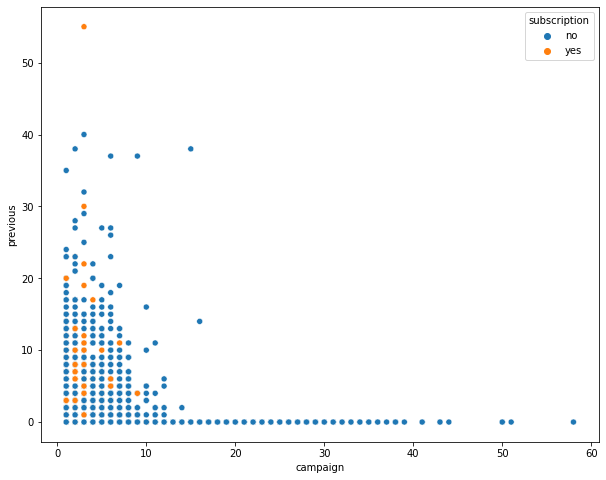

In [ ]:
sns.scatterplot(data=train_df, x="campaign", y="previous", hue="subscription")

#Scatterplot on continuous variables for testing data

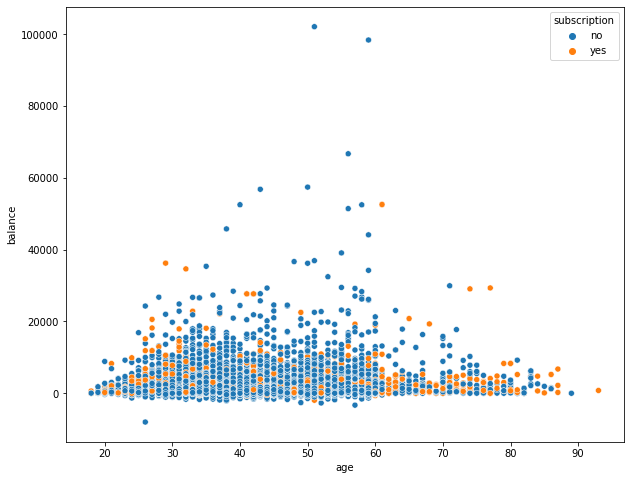

In [ ]:
sns.scatterplot(data=test_df, x="age", y="balance", hue="subscription")

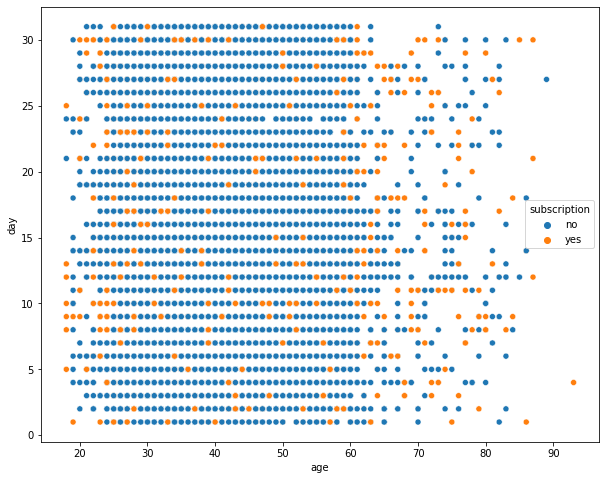

In [ ]:
sns.scatterplot(data=test_df, x="age", y="day", hue="subscription")

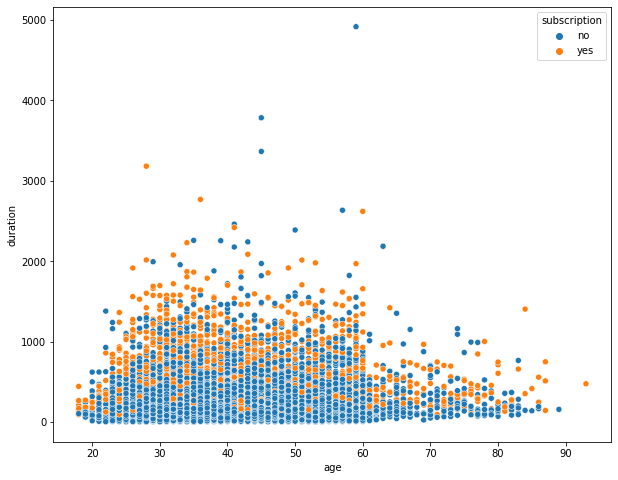

In [ ]:
sns.scatterplot(data=test_df, x="age", y="duration", hue="subscription")

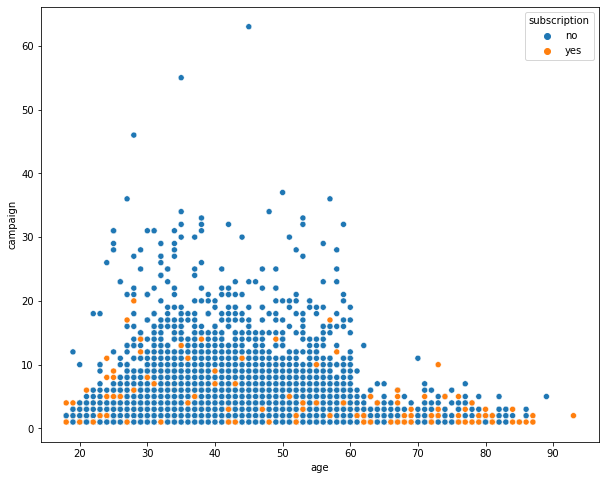

In [ ]:
sns.scatterplot(data=test_df, x="age", y="campaign", hue="subscription")

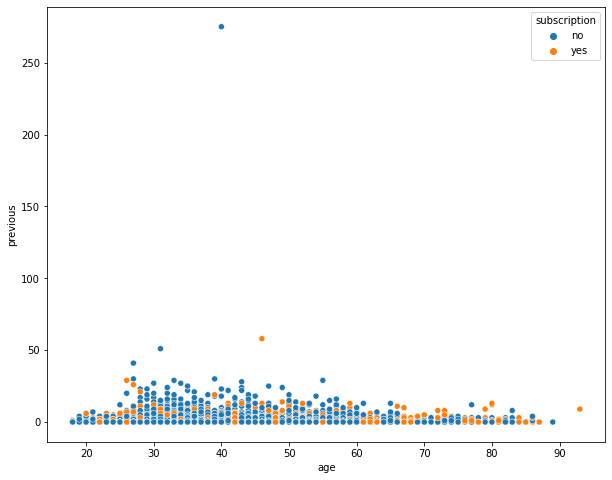

In [ ]:
sns.scatterplot(data=test_df, x="age", y="previous", hue="subscription")

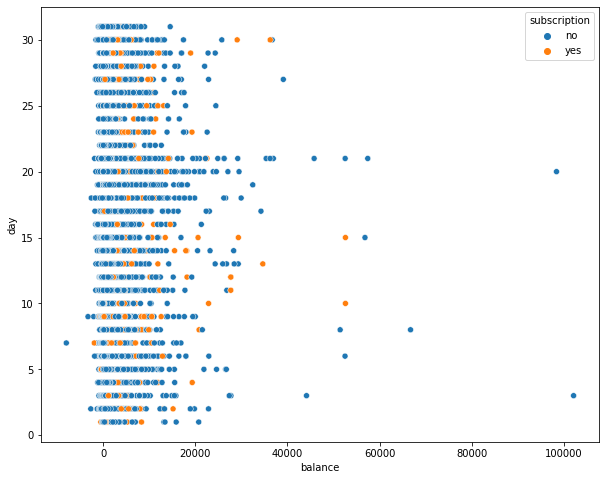

In [ ]:
sns.scatterplot(data=test_df, x="balance", y="day", hue="subscription")

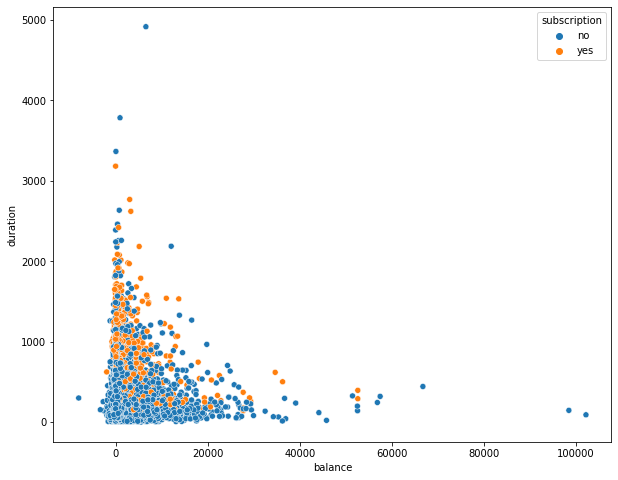

In [ ]:
sns.scatterplot(data=test_df, x="balance", y="duration", hue="subscription")

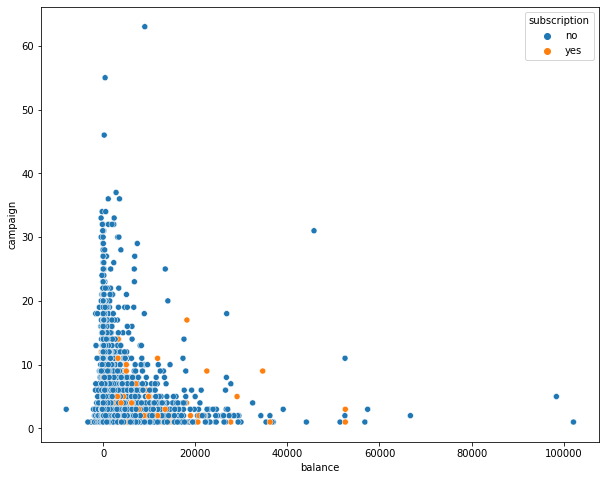

In [ ]:
sns.scatterplot(data=test_df, x="balance", y="campaign", hue="subscription")

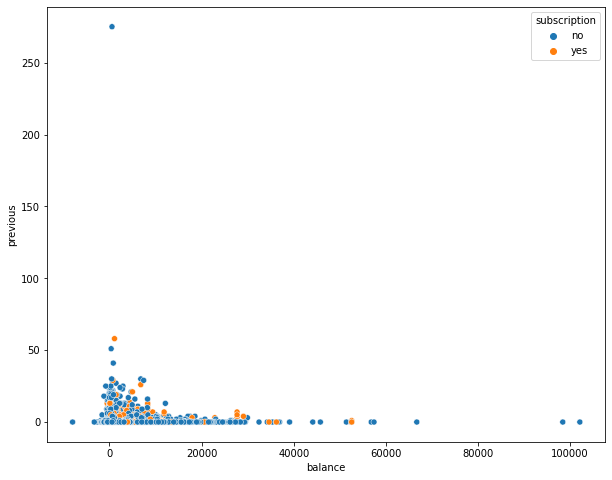

In [ ]:
sns.scatterplot(data=test_df, x="balance", y="previous", hue="subscription")

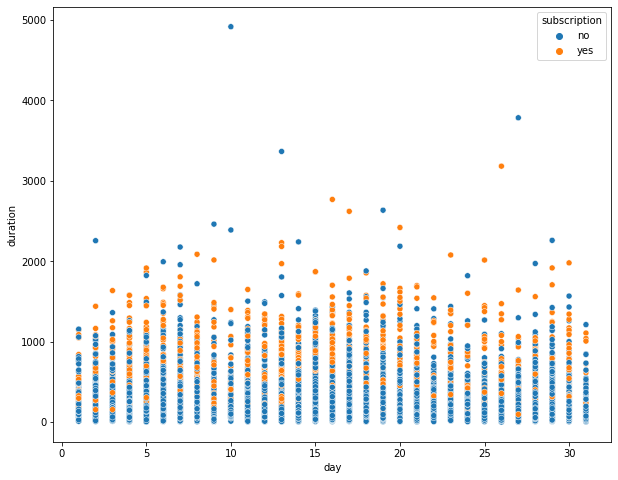

In [ ]:
sns.scatterplot(data=test_df, x="day", y="duration", hue="subscription")

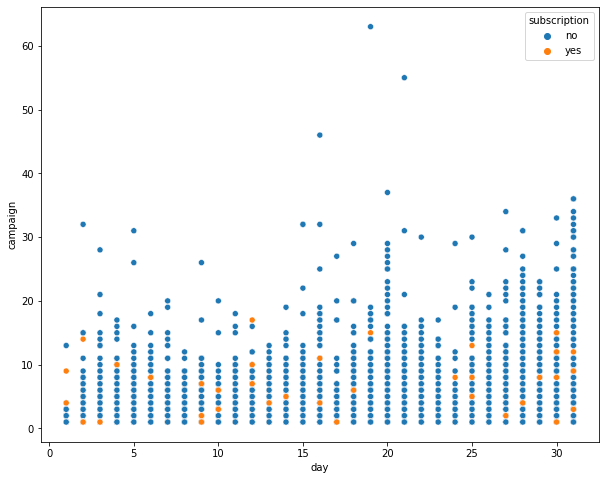

In [ ]:
sns.scatterplot(data=test_df, x="day", y="campaign", hue="subscription")

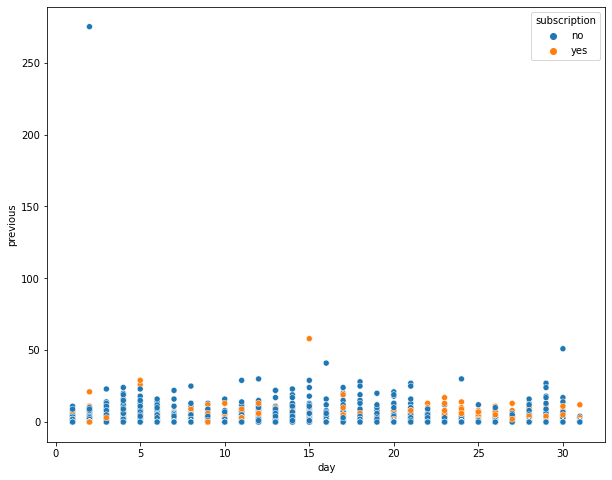

In [ ]:
sns.scatterplot(data=test_df, x="day", y="previous", hue="subscription")

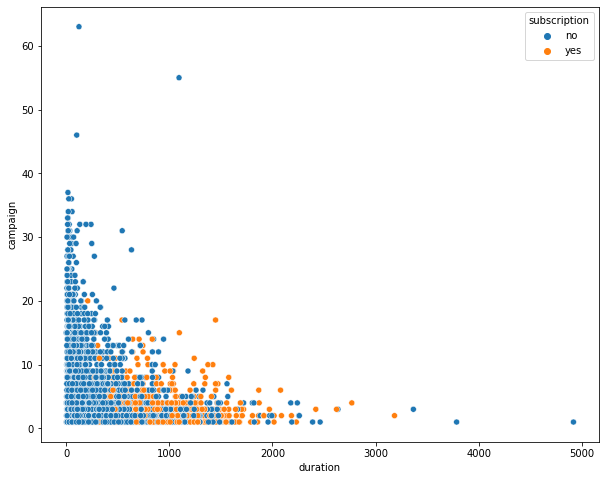

In [ ]:
sns.scatterplot(data=test_df, x="duration", y="campaign", hue="subscription")

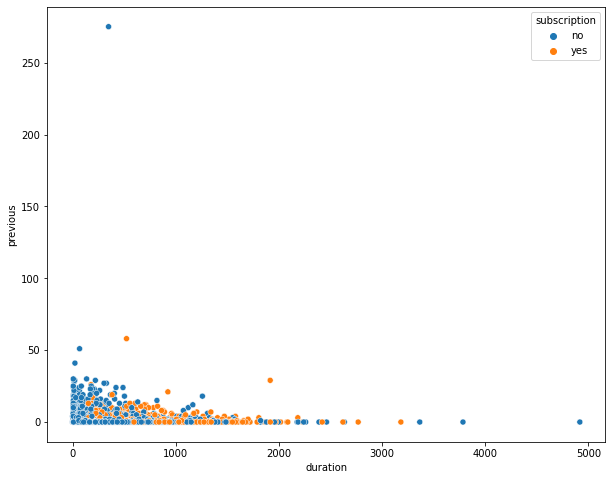

In [ ]:
sns.scatterplot(data=test_df, x="duration", y="previous", hue="subscription")

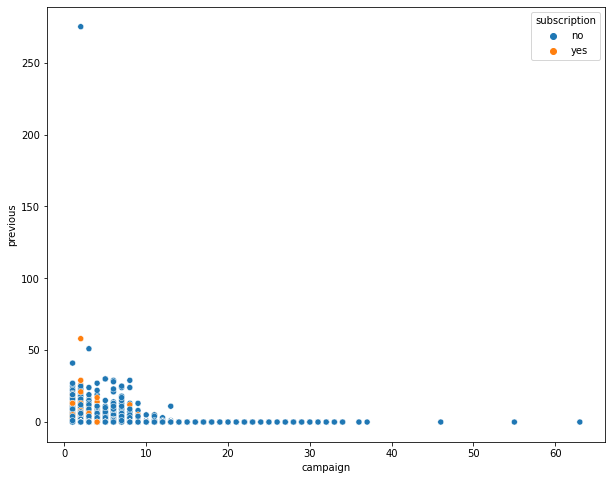

In [ ]:
sns.scatterplot(data=test_df, x="campaign", y="previous", hue="subscription")

#Hypothesis Testing on training set


##Chi - Square Test

Checking if subscription depends upon job.

- Since both are categorical variable, we use Chi- Square test.


---



*   **Null Hypotheses: Job and Subscription are independent of each other.**
*   **Alternate Hypotheses: Job and Subscription interdependent.**


In [ ]:
tab1 = pd.crosstab(index = train_df['job'], columns = train_df['subscription'])
tab1

subscription     no  yes
job                     
admin.         2763  383
blue-collar    5388  440
entrepreneur    805   73
housemaid       681   68
management     4852  769
retired        1070  317
self-employed   856  118
services       2284  225
student         401  158
technician     4038  497
unemployed      640  122
unknown         160   18

In [ ]:
from scipy.stats import chi2_contingency
chi2_contingency(tab1)
# argument for chi square test is the contingency table
# Now p value is smaller than 0.01 (1% level of significance) and at 0.05(5% level of significance), so null hypotheses is accepted

(482.34267977289585,
 1.8636836486593415e-96,
 11,
 array([[2776.26439578,  369.73560422],
        [5143.06067979,  684.93932021],
        [ 774.81250461,  103.18749539],
        [ 660.97330974,   88.02669026],
        [4960.38848337,  660.61151663],
        [1223.99196343,  163.00803657],
        [ 859.53004498,  114.46995502],
        [2214.12821647,  294.87178353],
        [ 493.30317776,   65.69682224],
        [4002.02130797,  532.97869203],
        [ 672.44547666,   89.55452334],
        [ 157.08043943,   20.91956057]]))

**As the p value is significant, we cannot reject the Null Hypothesis.**

**Job and Subscription hare independent of each other.**


---



---



Checking if subscription depends upon marital status.

- Since both are categorical variable, we use Chi- Square test.


---



*   **Null Hypotheses: Marital Status and Subscription are independent of each other.**
*   **Alternate Hypotheses: Marital Status and Subscription interdependent.**


In [ ]:
tab1 = pd.crosstab(index = train_df['marital'], columns = train_df['subscription'])
tab1

subscription     no   yes
marital                  
divorced       2698   385
married       14716  1652
single         6524  1151

In [ ]:
from scipy.stats import chi2_contingency
chi2_contingency(tab1)
# argument for chi square test is the contingency table
# Now p value is smaller than 0.01 (1% level of significance) and at 0.05(5% level of significance), so null hypotheses is accepted

(122.96501706775885,
 1.9883178444321663e-27,
 2,
 array([[ 2720.66850992,   362.33149008],
        [14444.3406326 ,  1923.6593674 ],
        [ 6772.99085748,   902.00914252]]))

**As the p value is significant, we cannot reject the Null Hypothesis.**

**Marital Status and Subscription hare independent of each other.**


---



---



Checking if subscription depends upon education.

- Since both are categorical variable, we use Chi- Square test.


---



*   **Null Hypotheses: Education and Subscription are independent of each other.**
*   **Alternate Hypotheses: Education and Subscription interdependent.**


In [ ]:
tab1 = pd.crosstab(index = train_df['education'], columns = train_df['subscription'])
tab1

subscription     no   yes
education                
primary        3733   358
secondary     12577  1494
tertiary       6652  1187
unknown         976   149

In [ ]:
from scipy.stats import chi2_contingency
chi2_contingency(tab1)
# argument for chi square test is the contingency table
# Now p value is smaller than 0.01 (1% level of significance) and at 0.05(5% level of significance), so null hypotheses is accepted

(142.27543555478348,
 1.221258725607843e-30,
 3,
 array([[ 3610.20268377,   480.79731623],
        [12417.29698444,  1653.70301556],
        [ 6917.71665561,   921.28334439],
        [  992.78367618,   132.21632382]]))

**As the p value is significant, we cannot reject the Null Hypothesis.**

**Education and Subscription hare independent of each other.**


---



---



Checking if subscription depends upon default.

- Since both are categorical variable, we use Chi- Square test.


---



*   **Null Hypotheses: Default and Subscription are independent of each other.**
*   **Alternate Hypotheses: Default and Subscription interdependent.**


In [ ]:
tab1 = pd.crosstab(index = train_df['default'], columns = train_df['subscription'])
tab1

subscription     no   yes
default                  
no            23449  3152
yes             489    36

In [ ]:
from scipy.stats import chi2_contingency
chi2_contingency(tab1)
# argument for chi square test is the contingency table
# Now p value is smaller than 0.01 (1% level of significance) and at 0.05(5% level of significance), so null hypotheses is accepted

(11.893993427230395,
 0.0005631525270071028,
 1,
 array([[23474.70095112,  3126.29904888],
        [  463.29904888,    61.70095112]]))

**As the p value is significant, we cannot reject the Null Hypothesis.**

**Default and Subscription hare independent of each other.**


---



---



Checking if subscription depends upon housing.

- Since both are categorical variable, we use Chi- Square test.


---



*   **Null Hypotheses: Housing and Subscription are independent of each other.**
*   **Alternate Hypotheses: Housing and Subscription interdependent.**


In [ ]:
tab1 = pd.crosstab(index = train_df['housing'], columns = train_df['subscription'])
tab1

subscription     no   yes
housing                  
no            10018  2012
yes           13920  1176

In [ ]:
from scipy.stats import chi2_contingency
chi2_contingency(tab1)
# argument for chi square test is the contingency table
# Now p value is smaller than 0.01 (1% level of significance) and at 0.05(5% level of significance), so null hypotheses is accepted

(514.4483904679494,
 6.829366535184984e-114,
 1,
 array([[10616.16677726,  1413.83322274],
        [13321.83322274,  1774.16677726]]))

**As the p value is significant, we cannot reject the Null Hypothesis.**

**Housing and Subscription hare independent of each other.**


---



---



Checking if subscription depends upon Loan.

- Since both are categorical variable, we use Chi- Square test.


---



*   **Null Hypotheses: Loan and Subscription are independent of each other.**
*   **Alternate Hypotheses: Loan and Subscription interdependent.**


In [ ]:
tab1 = pd.crosstab(index = train_df['loan'], columns = train_df['subscription'])
tab1

subscription     no   yes
loan                     
no            19896  2891
yes            4042   297

In [ ]:
from scipy.stats import chi2_contingency
chi2_contingency(tab1)
# argument for chi square test is the contingency table
# Now p value is smaller than 0.01 (1% level of significance) and at 0.05(5% level of significance), so null hypotheses is accepted

(119.38833243772854,
 8.610882549980661e-28,
 1,
 array([[20108.94367028,  2678.05632972],
        [ 3829.05632972,   509.94367028]]))

**As the p value is significant, we cannot reject the Null Hypothesis.**

**Loan and Subscription hare independent of each other.**


---



---



Checking if subscription depends upon contact.

- Since both are categorical variable, we use Chi- Square test.


---



*   **Null Hypotheses: Contact and Subscription are independent of each other.**
*   **Alternate Hypotheses: Contact and Subscription interdependent.**


In [ ]:
tab1 = pd.crosstab(index = train_df['contact'], columns = train_df['subscription'])
tab1

subscription     no   yes
contact                  
cellular      14992  2632
telephone      1495   252
unknown        7451   304

In [ ]:
from scipy.stats import chi2_contingency
chi2_contingency(tab1)
# argument for chi square test is the contingency table
# Now p value is smaller than 0.01 (1% level of significance) and at 0.05(5% level of significance), so null hypotheses is accepted

(642.7641827967932,
 2.6639810006639095e-140,
 2,
 array([[15552.72845241,  2071.27154759],
        [ 1541.68273981,   205.31726019],
        [ 6843.58880779,   911.41119221]]))

**As the p value is significant, we cannot reject the Null Hypothesis.**

**Loan and Subscription hare independent of each other.**


---



---



Checking if subscription depends upon month.

- Since both are categorical variable, we use Chi- Square test.


---



*   **Null Hypotheses: Month and Subscription are independent of each other.**
*   **Alternate Hypotheses: Month and Subscription interdependent.**


In [ ]:
tab1 = pd.crosstab(index = train_df['month'], columns = train_df['subscription'])
tab1

subscription    no  yes
month                  
apr           1394  371
aug           3349  413
dec             75   61
feb           1322  256
jan            750   88
jul           3760  375
jun           2933  315
mar            144  139
may           7650  563
nov           2143  241
oct            243  207
sep            175  159

In [ ]:
from scipy.stats import chi2_contingency
chi2_contingency(tab1)
# argument for chi square test is the contingency table
# Now p value is smaller than 0.01 (1% level of significance) and at 0.05(5% level of significance), so null hypotheses is accepted

(1865.5496760302356, 0.0, 11, array([[1557.56727863,  207.43272137],
        [3319.86861314,  442.13138686],
        [ 120.01651552,   15.98348448],
        [1392.54456979,  185.45543021],
        [ 739.51352946,   98.48647054],
        [3649.03155644,  485.96844356],
        [2866.27678242,  381.72321758],
        [ 249.74024921,   33.25975079],
        [7247.76207329,  965.23792671],
        [2103.81891912,  280.18108088],
        [ 397.11347047,   52.88652953],
        [ 294.74644253,   39.25355747]]))

**As the p value is significant, we cannot reject the Null Hypothesis.**

**Month and Subscription hare independent of each other.**


---



---



Checking if subscription depends upon poutcome.

- Since both are categorical variable, we use Chi- Square test.


---



*   **Null Hypotheses: Poutcome and Subscription are independent of each other.**
*   **Alternate Hypotheses: Poutcome and Subscription interdependent.**


In [ ]:
tab1 = pd.crosstab(index = train_df['poutcome'], columns = train_df['subscription'])
tab1

subscription     no   yes
poutcome                 
failure        2532   382
other           946   189
success         318   585
unknown       20142  2032

In [ ]:
from scipy.stats import chi2_contingency
chi2_contingency(tab1)
# argument for chi square test is the contingency table
# Now p value is smaller than 0.01 (1% level of significance) and at 0.05(5% level of significance), so null hypotheses is accepted

(2623.329637627356, 0.0, 3, array([[ 2571.5303399 ,   342.4696601 ],
        [ 1001.60841997,   133.39158003],
        [  796.87436408,   106.12563592],
        [19567.98687606,  2606.01312394]]))

**As the p value is significant, we cannot reject the Null Hypothesis.**

**Education and Subscription hare independent of each other.**


---



---



##ANOVA Test

- Checking for the means of married,single and divorced for the balance.


---




- **Null Hypotheses: Mean of balance of married = Mean of balance of single = Mean of balance of divorced**
- **Alternate Hypotheses: Atleast one of the means is not equal.**

In [ ]:
from scipy.stats import f_oneway
f_oneway(train_df[train_df['marital']=='married']['balance'], train_df[train_df['marital']=='single']['balance'],train_df[train_df['marital']=='divorced']['balance'])

F_onewayResult(statistic=14.394610773862722, pvalue=5.646968916080096e-07)

**p value is less than 0.05 significance level.**

**We cannot reject Null Hypothesis.**

**i.e. Mean of balance of married = Mean of balance of single = Mean of balance of divorced**

- Checking for the means of age <= 30, age > 30 for the balance.


---




- **Null Hypotheses: Mean of balance for age <= 30 = Mean of balance for age > 30**
- **Alternate Hypotheses: Atleast one of the means is not equal.**

In [ ]:
from scipy.stats import f_oneway
f_oneway(train_df[train_df['age'] <= 30]['balance'], train_df[train_df['age'] > 30]['balance'])

F_onewayResult(statistic=65.37611285565175, pvalue=6.444389725471591e-16)

**p value is lesser than 0.05 significance level.**

**We cannot reject Null Hypothesis.**

**i.e. Mean of balance for age <= 30 = Mean of balance for age > 30**

- Checking for the means of primary, secondary, tertiary and unknown education for the balance are equal or not.


---




- **Null Hypotheses: Mean of balance for primary education = Mean of balance for secondary education =  Mean of balance for tertiary education = Mean of balance for unknown education**
- **Alternate Hypotheses: Atleast one of the means is not equal.**

In [ ]:
from scipy.stats import f_oneway
f_oneway(train_df[train_df['education'] == 'primary']['balance'], train_df[train_df['education'] == 'secondary']['balance'], train_df[train_df['education'] == 'tertiary']['balance'], train_df[train_df['education'] == 'unknown']['balance'])

F_onewayResult(statistic=62.6506820427446, pvalue=2.3295150988303648e-40)

**p value is lesser than 0.05 significance level.**

**We cannot reject Null Hypothesis.**

**i.e. Mean of balance for all education types are equal**

- Checking for the means of all job titles for the balance are equal or not.


---




- **Null Hypotheses: Mean of balance for all job titles are equal**
- **Alternate Hypotheses: Atleast one of the means is not equal.**

In [ ]:
from scipy.stats import f_oneway
f_oneway(train_df[train_df['job'] == 'blue-collar']['balance'], train_df[train_df['job'] == 'management']['balance'], train_df[train_df['job'] == 'technician']['balance'], train_df[train_df['job'] == 'admin.']['balance'], train_df[train_df['job'] == 'services']['balance'], train_df[train_df['job'] == 'retired']['balance'], train_df[train_df['job'] == 'self-employed']['balance'], train_df[train_df['job'] == 'entrepreneur']['balance'], train_df[train_df['job'] == 'unemployed']['balance'], train_df[train_df['job'] == 'housemaid']['balance'], train_df[train_df['job'] == 'student']['balance'], train_df[train_df['job'] == 'unknown']['balance'])

F_onewayResult(statistic=25.86473744693114, pvalue=3.196576775341978e-54)

**p value is lesser than 0.05 significance level.**

**We cannot reject Null Hypothesis.**

**i.e. Mean of balance for all job titles are equal**

##T Test

Checking the means of the balance according to default status





**Null Hypothesis : Mean of balance of defaulters = Mean of balance of non-defaulters**

**Alternate Hypothesis : Mean of balance of defaulters != Mean of balance of non-defaulters** 

In [ ]:
import scipy.stats as stats
group1 = train_df[train_df['default'] == 'yes']['balance']
group2 = train_df[train_df['default'] == 'no']['balance']
ttest= stats.ttest_ind(a=group1, b=group2, equal_var=False,alternative='two-sided')
ttest

Ttest_indResult(statistic=-42.96599052874809, pvalue=1.9479063347818837e-226)

**As the p value is less than 0.05, we cannot reject the Null Hypothesis.**

**i.e. Mean of balance for defaulters is equal to mean of balance for non-defaulters** 


---



---



Checking the means of the balance according to housing loan status





**Null Hypothesis : Mean of balance of housing loan takers = Mean of balance of non-housing loan takers**

**Alternate Hypothesis : Mean of balance of housing loan takers != Mean of balance of non-housing loan takers** 

In [ ]:
import scipy.stats as stats
group1 = train_df[train_df['housing'] == 'yes']['balance']
group2 = train_df[train_df['housing'] == 'no']['balance']
ttest=stats.ttest_ind(a=group1, b=group2, equal_var=False,alternative='two-sided')
ttest

Ttest_indResult(statistic=-10.582702707717392, pvalue=4.175104557597247e-26)

**As the p value is less than 0.05, we cannot reject the Null Hypothesis.**

**i.e. Mean of balance of housing loan takers is equal to mean of balance of non-housing loan takers** 


---



---



Checking the means of the balance according to loan status





**Null Hypothesis : Mean of balance of loan takers = Mean of balance of non-loan takers**

**Alternate Hypothesis : Mean of balance of loan takers != Mean of balance of non-loan takers** 

In [ ]:
import scipy.stats as stats
group1 = train_df[train_df['loan'] == 'yes']['balance']
group2 = train_df[train_df['loan'] == 'no']['balance']
ttest=stats.ttest_ind(a=group1, b=group2, equal_var=False,alternative='two-sided')
ttest

Ttest_indResult(statistic=-20.49834709197832, pvalue=1.577711445144919e-91)

**As the p value is less than 0.05, we cannot reject the Null Hypothesis.**

**i.e. Mean of balance of loan takers is equal to mean of balance of non-loan takers** 


---



---



#Hypothesis Testing on testing set


##Chi - Square Test

Checking if subscription depends upon job.

- Since both are categorical variable, we use Chi- Square test.


---



*   **Null Hypotheses: Job and Subscription are independent of each other.**
*   **Alternate Hypotheses: Job and Subscription interdependent.**


In [ ]:
tab1 = pd.crosstab(index = test_df['job'], columns = test_df['subscription'])
tab1

subscription     no  yes
job                     
admin.         1777  248
blue-collar    3636  268
entrepreneur    559   50
housemaid       450   41
management     3305  532
retired         678  199
self-employed   536   69
services       1501  144
student         268  111
technician     2719  343
unemployed      461   80
unknown          94   16

In [ ]:
from scipy.stats import chi2_contingency
chi2_contingency(tab1)
# argument for chi square test is the contingency table
# Now p value is smaller than 0.01 (1% level of significance) and at 0.05(5% level of significance), so null hypotheses is accepted

(357.41392832421434,
 6.536477714769103e-70,
 11,
 array([[1789.74841028,  235.25158972],
        [3450.45816975,  453.54183025],
        [ 538.25026265,   70.74973735],
        [ 433.95875035,   57.04124965],
        [3391.2418026 ,  445.7581974 ],
        [ 775.11573127,  101.88426873],
        [ 534.71495715,   70.28504285],
        [1453.89438761,  191.10561239],
        [ 334.9701963 ,   44.0298037 ],
        [2706.27636163,  355.72363837],
        [ 478.15006912,   62.84993088],
        [  97.2209013 ,   12.7790987 ]]))

**As the p value is significant, we cannot reject the Null Hypothesis.**

**Job and Subscription hare independent of each other.**


---



---



Checking if subscription depends upon marital status.

- Since both are categorical variable, we use Chi- Square test.


---



*   **Null Hypotheses: Marital Status and Subscription are independent of each other.**
*   **Alternate Hypotheses: Marital Status and Subscription interdependent.**


In [ ]:
tab1 = pd.crosstab(index = test_df['marital'], columns = test_df['subscription'])
tab1

subscription    no   yes
marital                 
divorced      1887   237
married       9743  1103
single        4354   761

In [ ]:
from scipy.stats import chi2_contingency
chi2_contingency(tab1)
# argument for chi square test is the contingency table
# Now p value is smaller than 0.01 (1% level of significance) and at 0.05(5% level of significance), so null hypotheses is accepted

(75.53257730461338,
 3.965603017298727e-17,
 2,
 array([[1877.24722145,  246.75277855],
        [9585.98086812, 1260.01913188],
        [4520.77191042,  594.22808958]]))

**As the p value is significant, we cannot reject the Null Hypothesis.**

**Marital Status and Subscription hare independent of each other.**


---



---



Checking if subscription depends upon education.

- Since both are categorical variable, we use Chi- Square test.


---



*   **Null Hypotheses: Education and Subscription are independent of each other.**
*   **Alternate Hypotheses: Education and Subscription interdependent.**


In [ ]:
tab1 = pd.crosstab(index = test_df['education'], columns = test_df['subscription'])
tab1

subscription    no  yes
education              
primary       2527  233
secondary     8175  956
tertiary      4653  809
unknown        629  103

In [ ]:
from scipy.stats import chi2_contingency
chi2_contingency(tab1)
# argument for chi square test is the contingency table
# Now p value is smaller than 0.01 (1% level of significance) and at 0.05(5% level of significance), so null hypotheses is accepted

(97.3758558485701,
 5.6971873303116635e-21,
 3,
 array([[2439.36079624,  320.63920376],
        [8070.21863423, 1060.78136577],
        [4827.4596627 ,  634.5403373 ],
        [ 646.96090683,   85.03909317]]))

**As the p value is significant, we cannot reject the Null Hypothesis.**

**Education and Subscription hare independent of each other.**


---



---



Checking if subscription depends upon default.

- Since both are categorical variable, we use Chi- Square test.


---



*   **Null Hypotheses: Default and Subscription are independent of each other.**
*   **Alternate Hypotheses: Default and Subscription interdependent.**


In [ ]:
tab1 = pd.crosstab(index = test_df['default'], columns = test_df['subscription'])
tab1

subscription     no   yes
default                  
no            15710  2085
yes             274    16

In [ ]:
from scipy.stats import chi2_contingency
chi2_contingency(tab1)
# argument for chi square test is the contingency table
# Now p value is smaller than 0.01 (1% level of significance) and at 0.05(5% level of significance), so null hypotheses is accepted

(10.085966482691248,
 0.0014940277976926955,
 1,
 array([[15727.69035112,  2067.30964888],
        [  256.30964888,    33.69035112]]))

**As the p value is significant, we cannot reject the Null Hypothesis.**

**Default and Subscription hare independent of each other.**


---



---



Checking if subscription depends upon housing.

- Since both are categorical variable, we use Chi- Square test.


---



*   **Null Hypotheses: Housing and Subscription are independent of each other.**
*   **Alternate Hypotheses: Housing and Subscription interdependent.**


In [ ]:
tab1 = pd.crosstab(index = test_df['housing'], columns = test_df['subscription'])
tab1

subscription    no   yes
housing                 
no            6709  1342
yes           9275   759

In [ ]:
from scipy.stats import chi2_contingency
chi2_contingency(tab1)
# argument for chi square test is the contingency table
# Now p value is smaller than 0.01 (1% level of significance) and at 0.05(5% level of significance), so null hypotheses is accepted

(359.7247436453971,
 3.2323643026884915e-80,
 1,
 array([[7115.68614874,  935.31385126],
        [8868.31385126, 1165.68614874]]))

**As the p value is significant, we cannot reject the Null Hypothesis.**

**Housing and Subscription hare independent of each other.**


---



---



Checking if subscription depends upon Loan.

- Since both are categorical variable, we use Chi- Square test.


---



*   **Null Hypotheses: Loan and Subscription are independent of each other.**
*   **Alternate Hypotheses: Loan and Subscription interdependent.**


In [ ]:
tab1 = pd.crosstab(index = test_df['loan'], columns = test_df['subscription'])
tab1

subscription     no   yes
loan                     
no            13266  1914
yes            2718   187

In [ ]:
from scipy.stats import chi2_contingency
chi2_contingency(tab1)
# argument for chi square test is the contingency table
# Now p value is smaller than 0.01 (1% level of significance) and at 0.05(5% level of significance), so null hypotheses is accepted

(89.850017931561,
 2.569162498968119e-21,
 1,
 array([[13416.48437932,  1763.51562068],
        [ 2567.51562068,   337.48437932]]))

**As the p value is significant, we cannot reject the Null Hypothesis.**

**Loan and Subscription hare independent of each other.**


---



---



Checking if subscription depends upon contact.

- Since both are categorical variable, we use Chi- Square test.


---



*   **Null Hypotheses: Contact and Subscription are independent of each other.**
*   **Alternate Hypotheses: Contact and Subscription interdependent.**


In [ ]:
tab1 = pd.crosstab(index = test_df['contact'], columns = test_df['subscription'])
tab1

subscription    no   yes
contact                 
cellular      9924  1737
telephone     1021   138
unknown       5039   226

In [ ]:
from scipy.stats import chi2_contingency
chi2_contingency(tab1)
# argument for chi square test is the contingency table
# Now p value is smaller than 0.01 (1% level of significance) and at 0.05(5% level of significance), so null hypotheses is accepted

(397.2817748137079,
 5.387145666070305e-87,
 2,
 array([[10306.29936411,  1354.70063589],
        [ 1024.35476915,   134.64523085],
        [ 4653.34586674,   611.65413326]]))

**As the p value is significant, we cannot reject the Null Hypothesis.**

**Loan and Subscription hare independent of each other.**


---



---



Checking if subscription depends upon month.

- Since both are categorical variable, we use Chi- Square test.


---



*   **Null Hypotheses: Month and Subscription are independent of each other.**
*   **Alternate Hypotheses: Month and Subscription interdependent.**


In [ ]:
tab1 = pd.crosstab(index = test_df['month'], columns = test_df['subscription'])
tab1

subscription    no  yes
month                  
apr            961  206
aug           2210  275
dec             39   39
feb            886  185
jan            511   54
jul           2508  252
jun           1862  231
mar             85  109
may           5191  362
nov           1424  162
oct            172  116
sep            135  110

In [ ]:
from scipy.stats import chi2_contingency
chi2_contingency(tab1)
# argument for chi square test is the contingency table
# Now p value is smaller than 0.01 (1% level of significance) and at 0.05(5% level of significance), so null hypotheses is accepted

(1220.6620635866814,
 5.701605367489328e-255,
 11,
 array([[1031.42538015,  135.57461985],
        [2196.30854299,  288.69145701],
        [  68.93845729,    9.06154271],
        [ 946.57804811,  124.42195189],
        [ 499.36190213,   65.63809787],
        [2439.36079624,  320.63920376],
        [1849.84860382,  243.15139618],
        [ 171.46231684,   22.53768316],
        [4907.88786287,  645.11213713],
        [1401.74863146,  184.25136854],
        [ 254.54199613,   33.45800387],
        [ 216.53746199,   28.46253801]]))

**As the p value is significant, we cannot reject the Null Hypothesis.**

**Month and Subscription hare independent of each other.**


---



---



Checking if subscription depends upon poutcome.

- Since both are categorical variable, we use Chi- Square test.


---



*   **Null Hypotheses: Poutcome and Subscription are independent of each other.**
*   **Alternate Hypotheses: Poutcome and Subscription interdependent.**


In [ ]:
tab1 = pd.crosstab(index = test_df['poutcome'], columns = test_df['subscription'])
tab1

subscription     no   yes
poutcome                 
failure        1751   236
other           587   118
success         215   393
unknown       13431  1354

In [ ]:
from scipy.stats import chi2_contingency
chi2_contingency(tab1)
# argument for chi square test is the contingency table
# Now p value is smaller than 0.01 (1% level of significance) and at 0.05(5% level of significance), so null hypotheses is accepted

(1769.8759029895025, 0.0, 3, array([[ 1756.16300802,   230.83699198],
        [  623.09759469,    81.90240531],
        [  537.36643627,    70.63356373],
        [13067.37296102,  1717.62703898]]))

**As the p value is significant, we cannot reject the Null Hypothesis.**

**Education and Subscription hare independent of each other.**


---



---



##ANOVA Test

- Checking for the means of married,single and divorced for the balance.


---




- **Null Hypotheses: Mean of balance of married = Mean of balance of single = Mean of balance of divorced**
- **Alternate Hypotheses: Atleast one of the means is not equal.**

In [ ]:
from scipy.stats import f_oneway
f_oneway(test_df[test_df['marital']=='married']['balance'], test_df[test_df['marital']=='single']['balance'],test_df[test_df['marital']=='divorced']['balance'])

F_onewayResult(statistic=4.4722886461893046, pvalue=0.01143378324954565)

**p value is lesser than 0.05 significance level.**

**We cannot reject Null Hypothesis.**

**i.e. Mean of balance of married = Mean of balance of single = Mean of balance of divorced**

- Checking for the means of age <= 30, age > 30 for the balance.


---




- **Null Hypotheses: Mean of balance for age <= 30 = Mean of balance for age > 30**
- **Alternate Hypotheses: Atleast one of the means is not equal.**

In [ ]:
from scipy.stats import f_oneway
f_oneway(test_df[test_df['age'] <= 30]['balance'], test_df[test_df['age'] > 30]['balance'])

F_onewayResult(statistic=40.30815207748787, pvalue=2.220664248581524e-10)

**p value is lesser than 0.05 significance level.**

**We cannot reject Null Hypothesis.**

**i.e. Mean of balance for age <= 30 = Mean of balance for age > 30**

- Checking for the means of primary, secondary, tertiary and unknown education for the balance are equal or not.


---




- **Null Hypotheses: Mean of balance for primary education = Mean of balance for secondary education =  Mean of balance for tertiary education = Mean of balance for unknown education**
- **Alternate Hypotheses: Atleast one of the means is not equal.**

In [ ]:
from scipy.stats import f_oneway
f_oneway(test_df[test_df['education'] == 'primary']['balance'], test_df[test_df['education'] == 'secondary']['balance'], test_df[test_df['education'] == 'tertiary']['balance'], test_df[test_df['education'] == 'unknown']['balance'])

F_onewayResult(statistic=55.412070075200496, pvalue=1.2025935437665538e-35)

**p value is lesser than 0.05 significance level.**

**We cannot reject Null Hypothesis.**

**i.e. Mean of balance for all education types are equal**

- Checking for the means of all job titles for the balance are equal or not.


---




- **Null Hypotheses: Mean of balance for all job titles are equal**
- **Alternate Hypotheses: Atleast one of the means is not equal.**

In [ ]:
from scipy.stats import f_oneway
f_oneway(test_df[test_df['job'] == 'blue-collar']['balance'], test_df[test_df['job'] == 'management']['balance'], test_df[test_df['job'] == 'technician']['balance'], test_df[test_df['job'] == 'admin.']['balance'], test_df[test_df['job'] == 'services']['balance'], test_df[test_df['job'] == 'retired']['balance'], test_df[test_df['job'] == 'self-employed']['balance'], test_df[test_df['job'] == 'entrepreneur']['balance'], test_df[test_df['job'] == 'unemployed']['balance'], test_df[test_df['job'] == 'housemaid']['balance'], test_df[test_df['job'] == 'student']['balance'], test_df[test_df['job'] == 'unknown']['balance'])

F_onewayResult(statistic=18.238752169506075, pvalue=9.132418790833893e-37)

**p value is lesser than 0.05 significance level.**

**We cannot reject Null Hypothesis.**

**i.e. Mean of balance for all job titles are equal**

##T Test

Checking the means of the balance according to default status





**Null Hypothesis : Mean of balance of defaulters = Mean of balance of non-defaulters**

**Alternate Hypothesis : Mean of balance of defaulters != Mean of balance of non-defaulters** 

In [ ]:
import scipy.stats as ttest
group1 = test_df[test_df['default'] == 'yes']['balance']
group2 = test_df[test_df['default'] == 'no']['balance']
ttest=stats.ttest_ind(a=group1, b=group2, equal_var=False,alternative='two-sided')
ttest

Ttest_indResult(statistic=-20.553759251813645, pvalue=1.2843370096954912e-62)

**As the p value is less than 0.05, we cannot reject the Null Hypothesis.**

**i.e. Mean of balance for defaulters is equal to mean of balance for non-defaulters** 


---



---



Checking the means of the balance according to housing loan status





**Null Hypothesis : Mean of balance of housing loan takers = Mean of balance of non-housing loan takers**

**Alternate Hypothesis : Mean of balance of housing loan takers != Mean of balance of non-housing loan takers** 

In [ ]:
import scipy.stats as ttest
group1 = test_df[test_df['housing'] == 'yes']['balance']
group2 = test_df[test_df['housing'] == 'no']['balance']
ttest=stats.ttest_ind(a=group1, b=group2, equal_var=False,alternative='two-sided')
ttest

Ttest_indResult(statistic=-9.289071269448614, pvalue=1.7930669676247432e-20)

**As the p value is less than 0.05, we cannot reject the Null Hypothesis.**

**i.e. Mean of balance of housing loan takers is equal to mean of balance of non-housing loan takers** 


---



---



Checking the means of the balance according to loan status





**Null Hypothesis : Mean of balance of loan takers = Mean of balance of non-loan takers**

**Alternate Hypothesis : Mean of balance of loan takers != Mean of balance of non-loan takers** 

In [ ]:
import scipy.stats as ttest
group1 = test_df[test_df['loan'] == 'yes']['balance']
group2 = test_df[test_df['loan'] == 'no']['balance']
ttest=stats.ttest_ind(a=group1, b=group2, equal_var=False,alternative='two-sided')
ttest

Ttest_indResult(statistic=-14.895045120618054, pvalue=2.5090570107719e-49)

**As the p value is less than 0.05, we cannot reject the Null Hypothesis.**

**i.e. Mean of balance of loan takers is equal to mean of balance of non-loan takers** 


---



---



# Visualization on training data

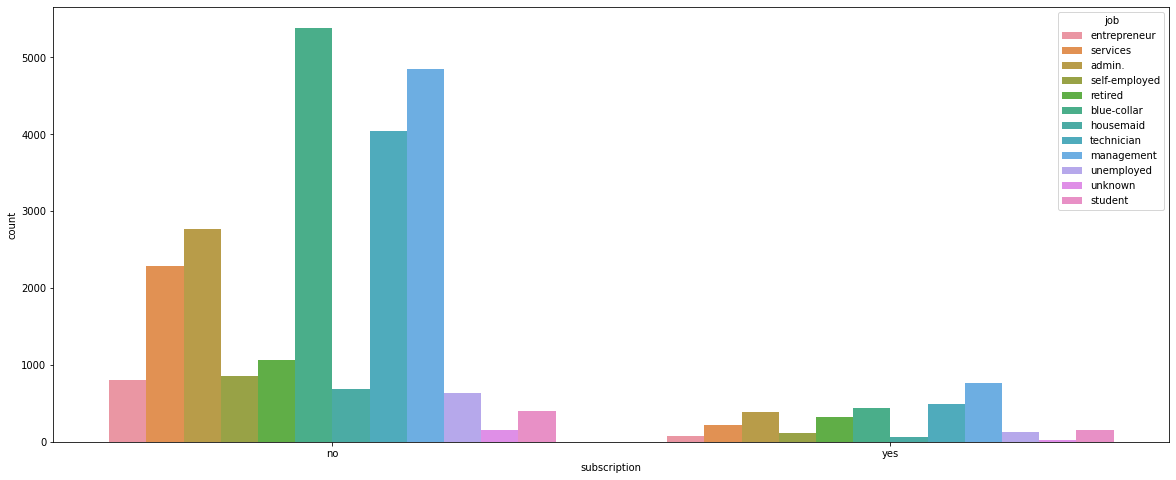

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(data = train_df, x = 'subscription', hue = 'job')

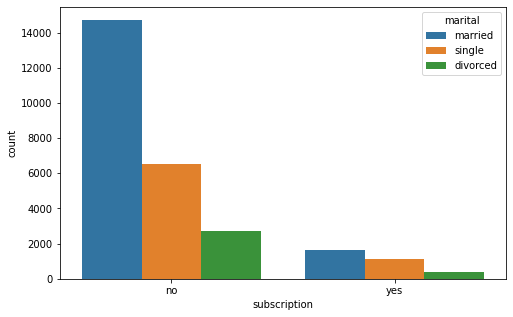

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data = train_df, x = 'subscription', hue = 'marital')

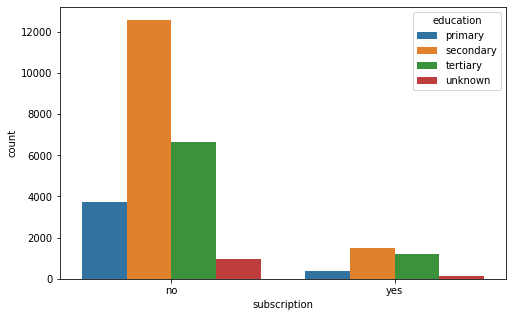

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data = train_df, x = 'subscription', hue = 'education')

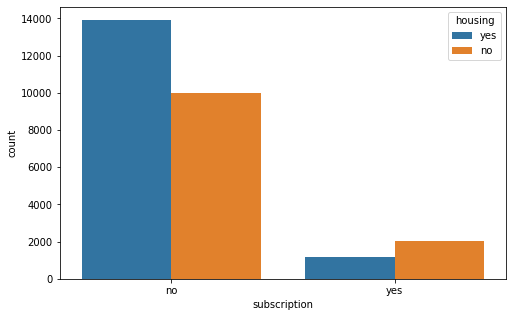

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data = train_df, x = 'subscription', hue = 'housing')

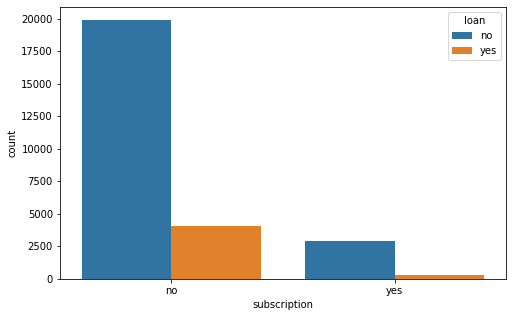

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data = train_df, x = 'subscription', hue = 'loan')

In [ ]:
px.histogram(train_df, 
             x='age', 
             title='age vs. subscription', 
             color='subscription')

In [ ]:
px.histogram(train_df, 
             x='balance', 
             title='balance vs. subscription', 
             color='subscription')

# Visualization on testing data

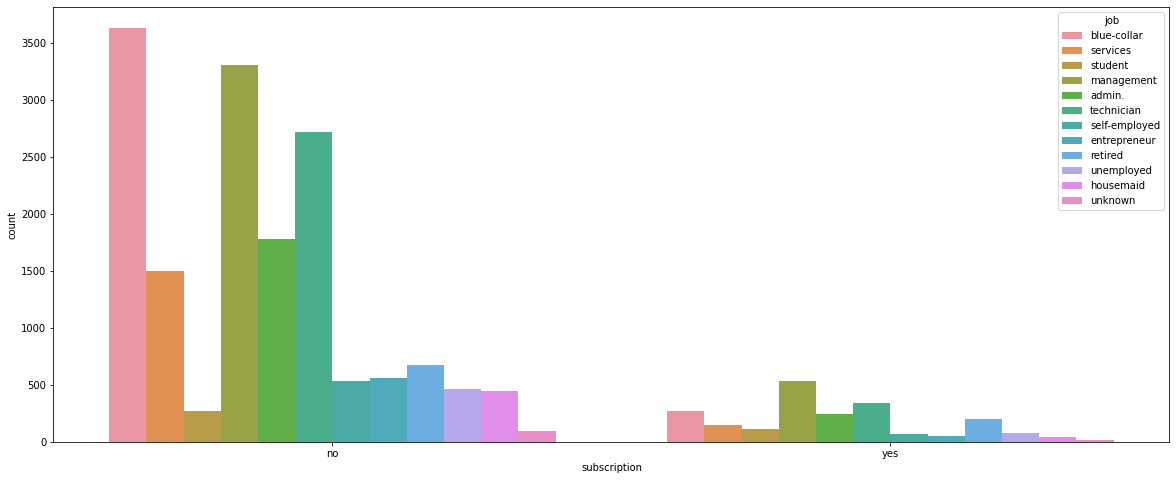

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(data = test_df, x = 'subscription', hue = 'job')

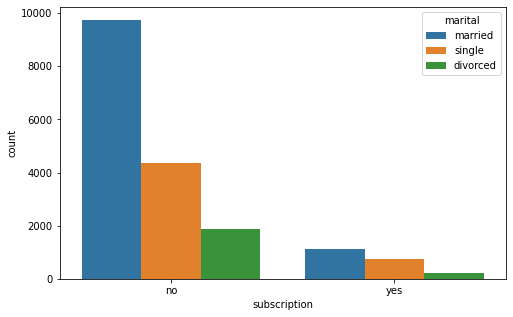

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data = test_df, x = 'subscription', hue = 'marital')

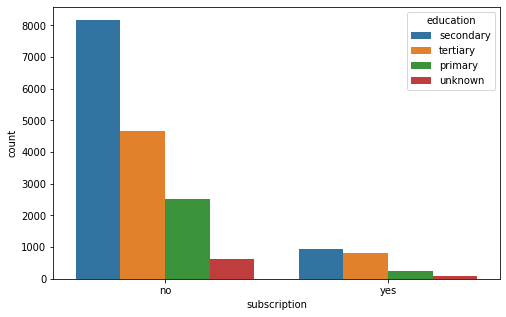

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data = test_df, x = 'subscription', hue = 'education')

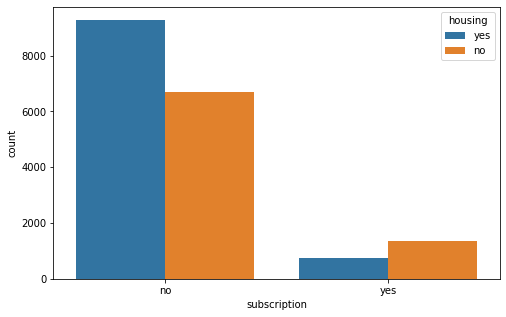

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data = test_df, x = 'subscription', hue = 'housing')

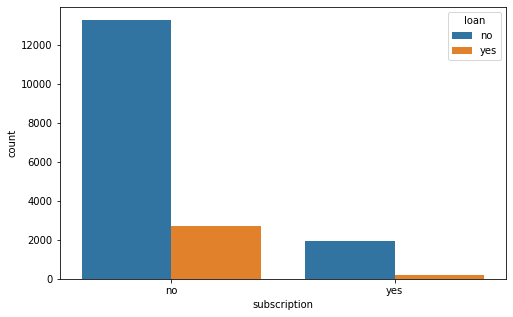

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data = test_df, x = 'subscription', hue = 'loan')

In [ ]:
px.histogram(test_df, 
             x='age', 
             title='age vs. subscription', 
             color='subscription')

In [ ]:
px.histogram(test_df, 
             x='balance', 
             title='balance vs. subscription', 
             color='subscription')

# New Section

In [ ]:
X_train = train_df.drop("subscription",axis = 1)
y_train = train_df["subscription"]
X_test = test_df.drop("subscription", axis = 1)
y_test = test_df["subscription"]

In [ ]:
X_train

age            job   marital  education default  balance housing loan  \
6377    45   entrepreneur   married    primary      no     -100     yes   no   
17236   29       services    single  secondary      no      166      no  yes   
4490    31         admin.    single  secondary      no      121     yes   no   
24231   40  self-employed    single   tertiary      no     1693     yes   no   
3978    28       services    single  secondary      no      317     yes   no   
...    ...            ...       ...        ...     ...      ...     ...  ...   
11284   44      housemaid    single    primary      no     1059      no   no   
44732   23        student    single   tertiary      no      508      no   no   
38158   34     technician  divorced   tertiary      no     1317     yes   no   
860     33        retired   married  secondary      no      165      no   no   
15795   38    blue-collar   married    primary      no      -41     yes   no   

        contact  day month  duration  campaign  called  previous poutcome  
6377    unknown   27   may       240         6       0         0  unknown  
17236  cellular   28   jul       108         8       0         0  unknown  
4490    unknown   20   may       187         1       0         0  unknown  
24231  cellular   17   nov       353         1       0         0  unknown  
3978    unknown   16   may        21         3       0         0  unknown  
...         ...  ...   ...       ...       ...     ...       ...      ...  
11284   unknown   18   jun      2093         1       0         0  unknown  
44732  cellular    8   sep       210         1       1         1  failure  
38158  cellular   15   may       239         1       0         0  unknown  
860     unknown    7   may       111         1       0         0  unknown  
15795  cellular   21   jul        68        10       0         0  unknown  

[27126 rows x 16 columns]

In [ ]:
y_train

6377      no
17236     no
4490      no
24231     no
3978      no
        ... 
11284    yes
44732     no
38158     no
860       no
15795     no
Name: subscription, Length: 27126, dtype: object

In [ ]:
X_test

age          job   marital  education default  balance housing loan  \
3776    40  blue-collar   married  secondary      no      580     yes   no   
9928    47     services    single  secondary      no     3644      no   no   
33409   25      student    single   tertiary      no      538     yes   no   
31885   42   management   married   tertiary      no     1773      no   no   
15738   56   management   married   tertiary      no      217      no  yes   
...    ...          ...       ...        ...     ...      ...     ...  ...   
38161   41  blue-collar  divorced  secondary      no      793     yes   no   
17440   40   management   married   tertiary     yes        0      no   no   
15788   38   technician  divorced  secondary      no     -397     yes  yes   
37445   43     services    single  secondary      no      550     yes   no   
19902   35   management   married   tertiary      no     3161      no   no   

        contact  day month  duration  campaign  called  previous poutcome  
3776    unknown   16   may       192         1       0         0  unknown  
9928    unknown    9   jun        83         2       0         0  unknown  
33409  cellular   20   apr       226         1       0         0  unknown  
31885  cellular    9   apr       311         1       1         1  failure  
15738  cellular   21   jul       121         2       0         0  unknown  
...         ...  ...   ...       ...       ...     ...       ...      ...  
38161  cellular   15   may       123         1       1         1  failure  
17440  cellular   28   jul       165         5       0         0  unknown  
15788  cellular   21   jul        91         9       0         0  unknown  
37445  cellular   13   may       107         2       0         0  unknown  
19902  cellular    8   aug       433         2       0         0  unknown  

[18085 rows x 16 columns]

In [ ]:
y_test

3776     no
9928     no
33409    no
31885    no
15738    no
         ..
38161    no
17440    no
15788    no
37445    no
19902    no
Name: subscription, Length: 18085, dtype: object

#Data Preprocessing on training data




In [ ]:
categorical = []
for col in X_train.columns:
  if X_train[col].dtype == "O":
        categorical.append(col)
print(f"There are {len(categorical)} categorical variables, --> {categorical}")

There are 9 categorical variables, --> ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


In [ ]:
X_train = pd.get_dummies(X_train, columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'])
print(X_train)

       age  balance  day  duration  campaign  called  previous  job_admin.  \
6377    45     -100   27       240         6       0         0           0   
17236   29      166   28       108         8       0         0           0   
4490    31      121   20       187         1       0         0           1   
24231   40     1693   17       353         1       0         0           0   
3978    28      317   16        21         3       0         0           0   
...    ...      ...  ...       ...       ...     ...       ...         ...   
11284   44     1059   18      2093         1       0         0           0   
44732   23      508    8       210         1       1         1           0   
38158   34     1317   15       239         1       0         0           0   
860     33      165    7       111         1       0         0           0   
15795   38      -41   21        68        10       0         0           0   

       job_blue-collar  job_entrepreneur  ...  month_jun  month

#Data Preprocessing on testing data





In [ ]:
categorical = []
for col in X_test.columns:
  if X_test[col].dtype == "O":
        categorical.append(col)
print(f"There are {len(categorical)} categorical variables, --> {categorical}")

There are 9 categorical variables, --> ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


In [ ]:
X_test = pd.get_dummies(X_test, columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'])
print(X_test)

       age  balance  day  duration  campaign  called  previous  job_admin.  \
3776    40      580   16       192         1       0         0           0   
9928    47     3644    9        83         2       0         0           0   
33409   25      538   20       226         1       0         0           0   
31885   42     1773    9       311         1       1         1           0   
15738   56      217   21       121         2       0         0           0   
...    ...      ...  ...       ...       ...     ...       ...         ...   
38161   41      793   15       123         1       1         1           0   
17440   40        0   28       165         5       0         0           0   
15788   38     -397   21        91         9       0         0           0   
37445   43      550   13       107         2       0         0           0   
19902   35     3161    8       433         2       0         0           0   

       job_blue-collar  job_entrepreneur  ...  month_jun  month

# Normalization of training data

In [ ]:
# To scale the data 
# Import packages
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train[["age", "balance","day","duration","campaign", "previous"]] = min_max_scaler.fit_transform(train_df[["age", "balance","day","duration","campaign","previous"]])

In [ ]:
X_train.head()

age   balance       day  duration  campaign  called  previous  \
6377   0.350649  0.076626  0.866667  0.061840  0.087719       0       0.0   
17236  0.142857  0.079647  0.900000  0.027828  0.122807       0       0.0   
4490   0.168831  0.079136  0.633333  0.048183  0.000000       0       0.0   
24231  0.285714  0.096989  0.533333  0.090956  0.000000       0       0.0   
3978   0.129870  0.081362  0.500000  0.005411  0.035088       0       0.0   

       job_admin.  job_blue-collar  job_entrepreneur  ...  month_jun  \
6377            0                0                 1  ...          0   
17236           0                0                 0  ...          0   
4490            1                0                 0  ...          0   
24231           0                0                 0  ...          0   
3978            0                0                 0  ...          0   

       month_mar  month_may  month_nov  month_oct  month_sep  \
6377           0          1          0          0          0   
17236          0          0          0          0          0   
4490           0          1          0          0          0   
24231          0          0          1          0          0   
3978           0          1          0          0          0   

       poutcome_failure  poutcome_other  poutcome_success  poutcome_unknown  
6377                  0               0                 0                 1  
17236                 0               0                 0                 1  
4490                  0               0                 0                 1  
24231                 0               0                 0                 1  
3978                  0               0                 0                 1  

[5 rows x 51 columns]

In [ ]:
X_train.describe()

age       balance           day      duration      campaign  \
count  27126.000000  27126.000000  27126.000000  27126.000000  27126.000000   
mean       0.298516      0.093151      0.493649      0.066534      0.030967   
std        0.138519      0.033679      0.276935      0.066698      0.055202   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.194805      0.078568      0.233333      0.026540      0.000000   
50%        0.272727      0.082827      0.500000      0.046380      0.017544   
75%        0.389610      0.094116      0.666667      0.082195      0.035088   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

             called      previous    job_admin.  job_blue-collar  \
count  27126.000000  27126.000000  27126.000000     27126.000000   
mean       0.182703      0.010404      0.115977         0.214849   
std        0.386430      0.033888      0.320204         0.410725   
min        0.000000      0.000000      0.000000         0.000000   
25%        0.000000      0.000000      0.000000         0.000000   
50%        0.000000      0.000000      0.000000         0.000000   
75%        0.000000      0.000000      0.000000         0.000000   
max        1.000000      1.000000      1.000000         1.000000   

       job_entrepreneur  ...     month_jun     month_mar     month_may  \
count      27126.000000  ...  27126.000000  27126.000000  27126.000000   
mean           0.032367  ...      0.119738      0.010433      0.302772   
std            0.176977  ...      0.324660      0.101609      0.459466   
min            0.000000  ...      0.000000      0.000000      0.000000   
25%            0.000000  ...      0.000000      0.000000      0.000000   
50%            0.000000  ...      0.000000      0.000000      0.000000   
75%            0.000000  ...      0.000000      0.000000      1.000000   
max            1.000000  ...      1.000000      1.000000      1.000000   

          month_nov     month_oct     month_sep  poutcome_failure  \
count  27126.000000  27126.000000  27126.000000      27126.000000   
mean       0.087886      0.016589      0.012313          0.107425   
std        0.283134      0.127729      0.110280          0.309658   
min        0.000000      0.000000      0.000000          0.000000   
25%        0.000000      0.000000      0.000000          0.000000   
50%        0.000000      0.000000      0.000000          0.000000   
75%        0.000000      0.000000      0.000000          0.000000   
max        1.000000      1.000000      1.000000          1.000000   

       poutcome_other  poutcome_success  poutcome_unknown  
count    27126.000000      27126.000000      27126.000000  
mean         0.041842          0.033289          0.817445  
std          0.200231          0.179394          0.386309  
min          0.000000          0.000000          0.000000  
25%          0.000000          0.000000          1.000000  
50%          0.000000          0.000000          1.000000  
75%          0.000000          0.000000          1.000000  
max          1.000000          1.000000          1.000000  

[8 rows x 51 columns]

# Normalization of testing data

In [ ]:
# To scale the data 
# Import packages
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_test[["age", "balance","day","duration","campaign", "previous"]] = min_max_scaler.fit_transform(test_df[["age", "balance","day","duration","campaign","previous"]])

In [ ]:
X_test.head()

age   balance       day  duration  campaign  called  previous  \
3776   0.293333  0.078069  0.500000  0.039040  0.000000       0  0.000000   
9928   0.386667  0.105887  0.266667  0.016877  0.016129       0  0.000000   
33409  0.093333  0.077688  0.633333  0.045954  0.000000       0  0.000000   
31885  0.320000  0.088900  0.266667  0.063237  0.000000       1  0.003636   
15738  0.506667  0.074773  0.666667  0.024603  0.016129       0  0.000000   

       job_admin.  job_blue-collar  job_entrepreneur  ...  month_jun  \
3776            0                1                 0  ...          0   
9928            0                0                 0  ...          1   
33409           0                0                 0  ...          0   
31885           0                0                 0  ...          0   
15738           0                0                 0  ...          0   

       month_mar  month_may  month_nov  month_oct  month_sep  \
3776           0          1          0          0          0   
9928           0          0          0          0          0   
33409          0          0          0          0          0   
31885          0          0          0          0          0   
15738          0          0          0          0          0   

       poutcome_failure  poutcome_other  poutcome_success  poutcome_unknown  
3776                  0               0                 0                 1  
9928                  0               0                 0                 1  
33409                 0               0                 0                 1  
31885                 1               0                 0                 0  
15738                 0               0                 0                 1  

[5 rows x 51 columns]

In [ ]:
X_test.describe()

age       balance           day      duration      campaign  \
count  18085.000000  18085.000000  18085.000000  18085.000000  18085.000000   
mean       0.304826      0.085270      0.493394      0.052476      0.028418   
std        0.140633      0.028689      0.278143      0.051958      0.048773   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.200000      0.073484      0.233333      0.021147      0.000000   
50%        0.280000      0.076898      0.500000      0.036600      0.016129   
75%        0.400000      0.085614      0.666667      0.064457      0.032258   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

             called      previous    job_admin.  job_blue-collar  \
count  18085.000000  18085.000000  18085.000000     18085.000000   
mean       0.182527      0.002154      0.111971         0.215870   
std        0.386289      0.010320      0.315340         0.411436   
min        0.000000      0.000000      0.000000         0.000000   
25%        0.000000      0.000000      0.000000         0.000000   
50%        0.000000      0.000000      0.000000         0.000000   
75%        0.000000      0.000000      0.000000         0.000000   
max        1.000000      1.000000      1.000000         1.000000   

       job_entrepreneur  ...     month_jun     month_mar     month_may  \
count      18085.000000  ...  18085.000000  18085.000000  18085.000000   
mean           0.033674  ...      0.115731      0.010727      0.307050   
std            0.180394  ...      0.319911      0.103018      0.461283   
min            0.000000  ...      0.000000      0.000000      0.000000   
25%            0.000000  ...      0.000000      0.000000      0.000000   
50%            0.000000  ...      0.000000      0.000000      0.000000   
75%            0.000000  ...      0.000000      0.000000      1.000000   
max            1.000000  ...      1.000000      1.000000      1.000000   

          month_nov     month_oct     month_sep  poutcome_failure  \
count  18085.000000  18085.000000  18085.000000      18085.000000   
mean       0.087697      0.015925      0.013547          0.109870   
std        0.282862      0.125188      0.115604          0.312736   
min        0.000000      0.000000      0.000000          0.000000   
25%        0.000000      0.000000      0.000000          0.000000   
50%        0.000000      0.000000      0.000000          0.000000   
75%        0.000000      0.000000      0.000000          0.000000   
max        1.000000      1.000000      1.000000          1.000000   

       poutcome_other  poutcome_success  poutcome_unknown  
count    18085.000000      18085.000000      18085.000000  
mean         0.038983          0.033619          0.817528  
std          0.193559          0.180251          0.386243  
min          0.000000          0.000000          0.000000  
25%          0.000000          0.000000          1.000000  
50%          0.000000          0.000000          1.000000  
75%          0.000000          0.000000          1.000000  
max          1.000000          1.000000          1.000000  

[8 rows x 51 columns]

# Model Building

## Logistic Regression

In [ ]:
#Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.metrics import roc_auc_score, roc_curve
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Defining Parameters
parameters = {'penalty' : ['l2'],
              'C': [0.1, 0.3, 0.6],
              'max_iter': [250, 500, 1000]
             }
lr = LogisticRegression()
clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=-1)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 0.3, 0.6], 'max_iter': [250, 500, 1000],
                         'penalty': ['l2']},
             verbose=5)

In [ ]:
#Choosing best parameters
best_clf = clf.best_params_ , clf.best_score_
best_clf

({'C': 0.6, 'max_iter': 1000, 'penalty': 'l2'}, 0.9094615610169507)

In [ ]:
#Instantiate the Logistic Regression
lr1 = LogisticRegression(C=0.1, penalty='l2', verbose=5,max_iter=250)
lr1.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.5s finished


LogisticRegression(C=0.1, max_iter=250, verbose=5)

In [ ]:
y_pred = lr1.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
lr1.score(X_test,y_test)

0.861771535994692

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [ ]:
pd.crosstab(y_test, y_pred)

col_0     0    1
row_0           
0      7187  799
1       451  606

In [ ]:
#Evaluation Metrics
print(accuracy_score(y_test, y_pred), ": is the accuracy score")
print(precision_score(y_test,y_pred), ": is the precision score")#pos_label='yes'
print(recall_score(y_test, y_pred), ": is the recall score")
print(f1_score(y_test, y_pred), ": is the f1 score")

0.861771535994692 : is the accuracy score
0.4313167259786477 : is the precision score
0.5733207190160833 : is the recall score
0.4922826969943135 : is the f1 score


## Decision Tree Classifier

In [ ]:
# Create Decision Tree classifier object
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="entropy", max_depth=15)

# Train Decision Tree Classifier
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Evaluation Metrics
print(accuracy_score(y_test, y_pred), ": is the accuracy score")
print(precision_score(y_test, y_pred), ": is the precision score")
print(recall_score(y_test, y_pred), ": is the recall score")
print(f1_score(y_test, y_pred), ": is the f1 score")


0.8748203029967931 : is the accuracy score
0.4720774385703649 : is the precision score
0.5998107852412489 : is the recall score
0.5283333333333334 : is the f1 score


##Random Forest

In [ ]:
# Import the modules we are using
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Defining Parameters
param_dist = {"max_features": [2,3,5],
              "min_samples_leaf": [3,4,6],
              "criterion": ["gini"],
              "n_estimators": [1000]}

In [ ]:
# Build the grid search
dfrst = RandomForestClassifier()
grid = GridSearchCV(estimator=dfrst, param_grid=param_dist, cv = 5, n_jobs=-1)
grid_results = grid.fit(X_train, y_train)
grid.best_params_, grid.best_score_

({'criterion': 'gini',
  'max_features': 3,
  'min_samples_leaf': 3,
  'n_estimators': 1000},
 0.9237558580494809)

In [ ]:
# Extract the best decision forest 
best_clf = grid_results.best_estimator_
y_pred = best_clf.predict(X_test)

In [ ]:
#Evaluation Metrics
print(accuracy_score(y_test, y_pred), ": is the accuracy score")
print(precision_score(y_test, y_pred), ": is the precision score")
print(recall_score(y_test, y_pred), ": is the recall score")
print(f1_score(y_test, y_pred), ": is the f1 score")

0.8991485126617274 : is the accuracy score
0.5864123957091776 : is the precision score
0.46546830652790916 : is the recall score
0.5189873417721519 : is the f1 score


#Result

In [ ]:
import pandas as pd
x= pd.DataFrame({'Accuracy' : [86.17,87.48,89.91],
                 'Precision' : [43.13,47.20,58.64],
                 'Recall' : [57.33,59.98,46.54],
                 'F1 Score' :[49.22,52.83,51.89]},
                 index=['Logistic Reg.','Decision Tree','Random Forest'])
x

Accuracy  Precision  Recall  F1 Score
Logistic Reg.     86.17      43.13   57.33     49.22
Decision Tree     87.48      47.20   59.98     52.83
Random Forest     89.91      58.64   46.54     51.89